In [ ]:
library(readxl)
Boyacafp<-read_excel("Boyaca.xlsx")
Boyacaf<-as.data.frame(Boyacafp[,-1])
rownames(Boyacaf)<-Boyacafp$Nombre
str(Boyacaf)

'data.frame':	123 obs. of  28 variables:
 $ Provincia                                       : chr  "Oriente" "Centro" "Sugamuxi" "Ricaurte" ...
 $ Año de fundación                                : chr  "1907" "1539" "1777" "1856" ...
 $ Altitud (m.s.n.m.)                              : num  1925 2678 3030 2575 2645 ...
 $ Área (km²)                                      : num  58 118 828 155 285 ...
 $ Poblacion_Total_2023                            : num  2030 185469 16319 6265 7914 ...
 $ Hombres_2023                                    : num  1064 87724 8344 3140 3784 ...
 $ Mujeres_2023                                    : num  966 97745 7975 3125 4130 ...
 $ Valor agregado PIB                              : num  30.5 4489.1 586 154.1 131.9 ...
 $ Actividades terciarias ***                      : num  16.9 3985 179 74.4 89.5 ...
 $ Actividades secundarias **                      : num  2.4 391.8 46.3 12.3 11.9 ...
 $ Actividades primarias *                         : num  11.3 112.3 3

In [ ]:
library(dplyr)

Boyacaf <- Boyacaf %>%
  select_if(~!is.character(.))
str(Boyacaf)

'data.frame':	123 obs. of  24 variables:
 $ Altitud (m.s.n.m.)                              : num  1925 2678 3030 2575 2645 ...
 $ Área (km²)                                      : num  58 118 828 155 285 ...
 $ Poblacion_Total_2023                            : num  2030 185469 16319 6265 7914 ...
 $ Hombres_2023                                    : num  1064 87724 8344 3140 3784 ...
 $ Mujeres_2023                                    : num  966 97745 7975 3125 4130 ...
 $ Valor agregado PIB                              : num  30.5 4489.1 586 154.1 131.9 ...
 $ Actividades terciarias ***                      : num  16.9 3985 179 74.4 89.5 ...
 $ Actividades secundarias **                      : num  2.4 391.8 46.3 12.3 11.9 ...
 $ Actividades primarias *                         : num  11.3 112.3 360.7 67.4 30.4 ...
 $ # Promedio empresas 2021                        : num  3 4117 34 42 69 ...
 $ # promedio trabajadores 2021                    : num  19 61023 166 257 421 ...
 $ Promedio d

In [ ]:
# Contar los valores nulos en cada columna
valores_nulos <- colSums(is.na(Boyacaf))

# Mostrar el número de valores nulos en cada columna
print(valores_nulos)

                              Altitud (m.s.n.m.) 
                                               0 
                                      Área (km²) 
                                               0 
                            Poblacion_Total_2023 
                                               0 
                                    Hombres_2023 
                                               0 
                                    Mujeres_2023 
                                               0 
                              Valor agregado PIB 
                                               0 
                      Actividades terciarias *** 
                                               0 
                      Actividades secundarias ** 
                                               0 
                         Actividades primarias * 
                                               0 
                        # Promedio empresas 2021 
                                               0 


In [ ]:
# Llenar los valores nulos con ceros en todo el dataframe
Boyacaf <- replace(Boyacaf, is.na(Boyacaf), 0)

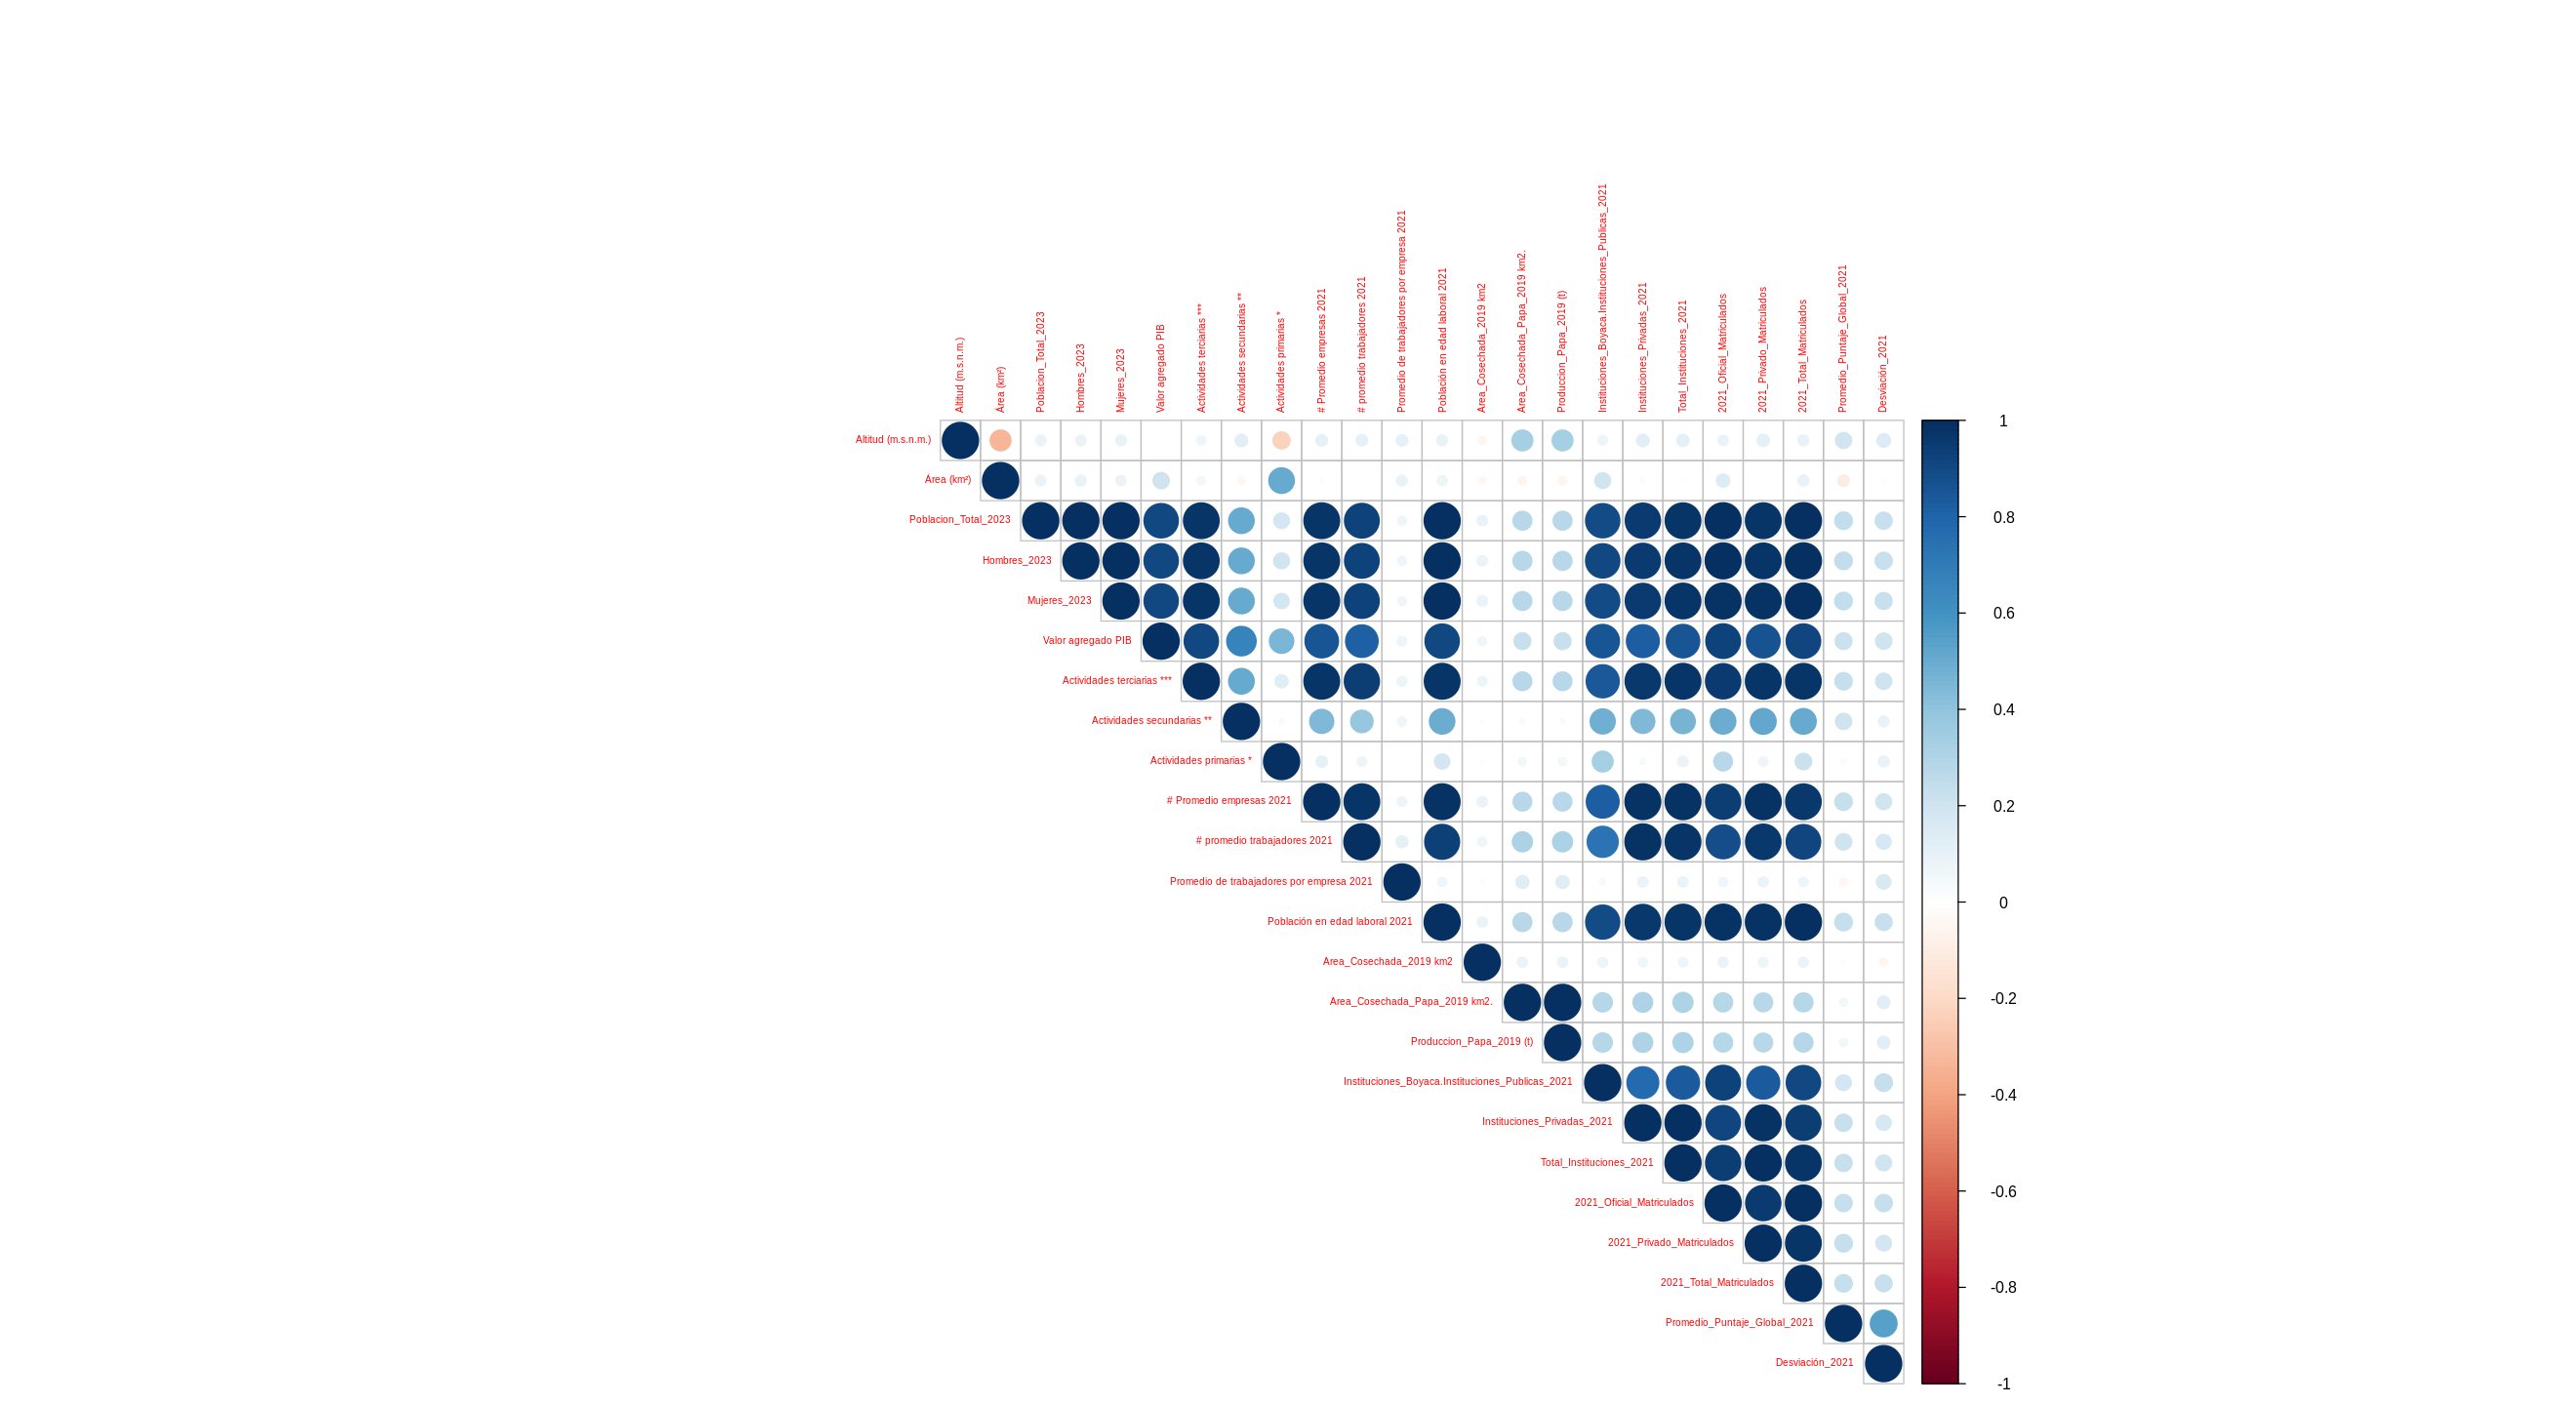

In [ ]:
library(corrplot)
corrmatrix<-cor(Boyacaf[,1:24])
corrplot(corrmatrix, tl.cex=0.5, type="upper")

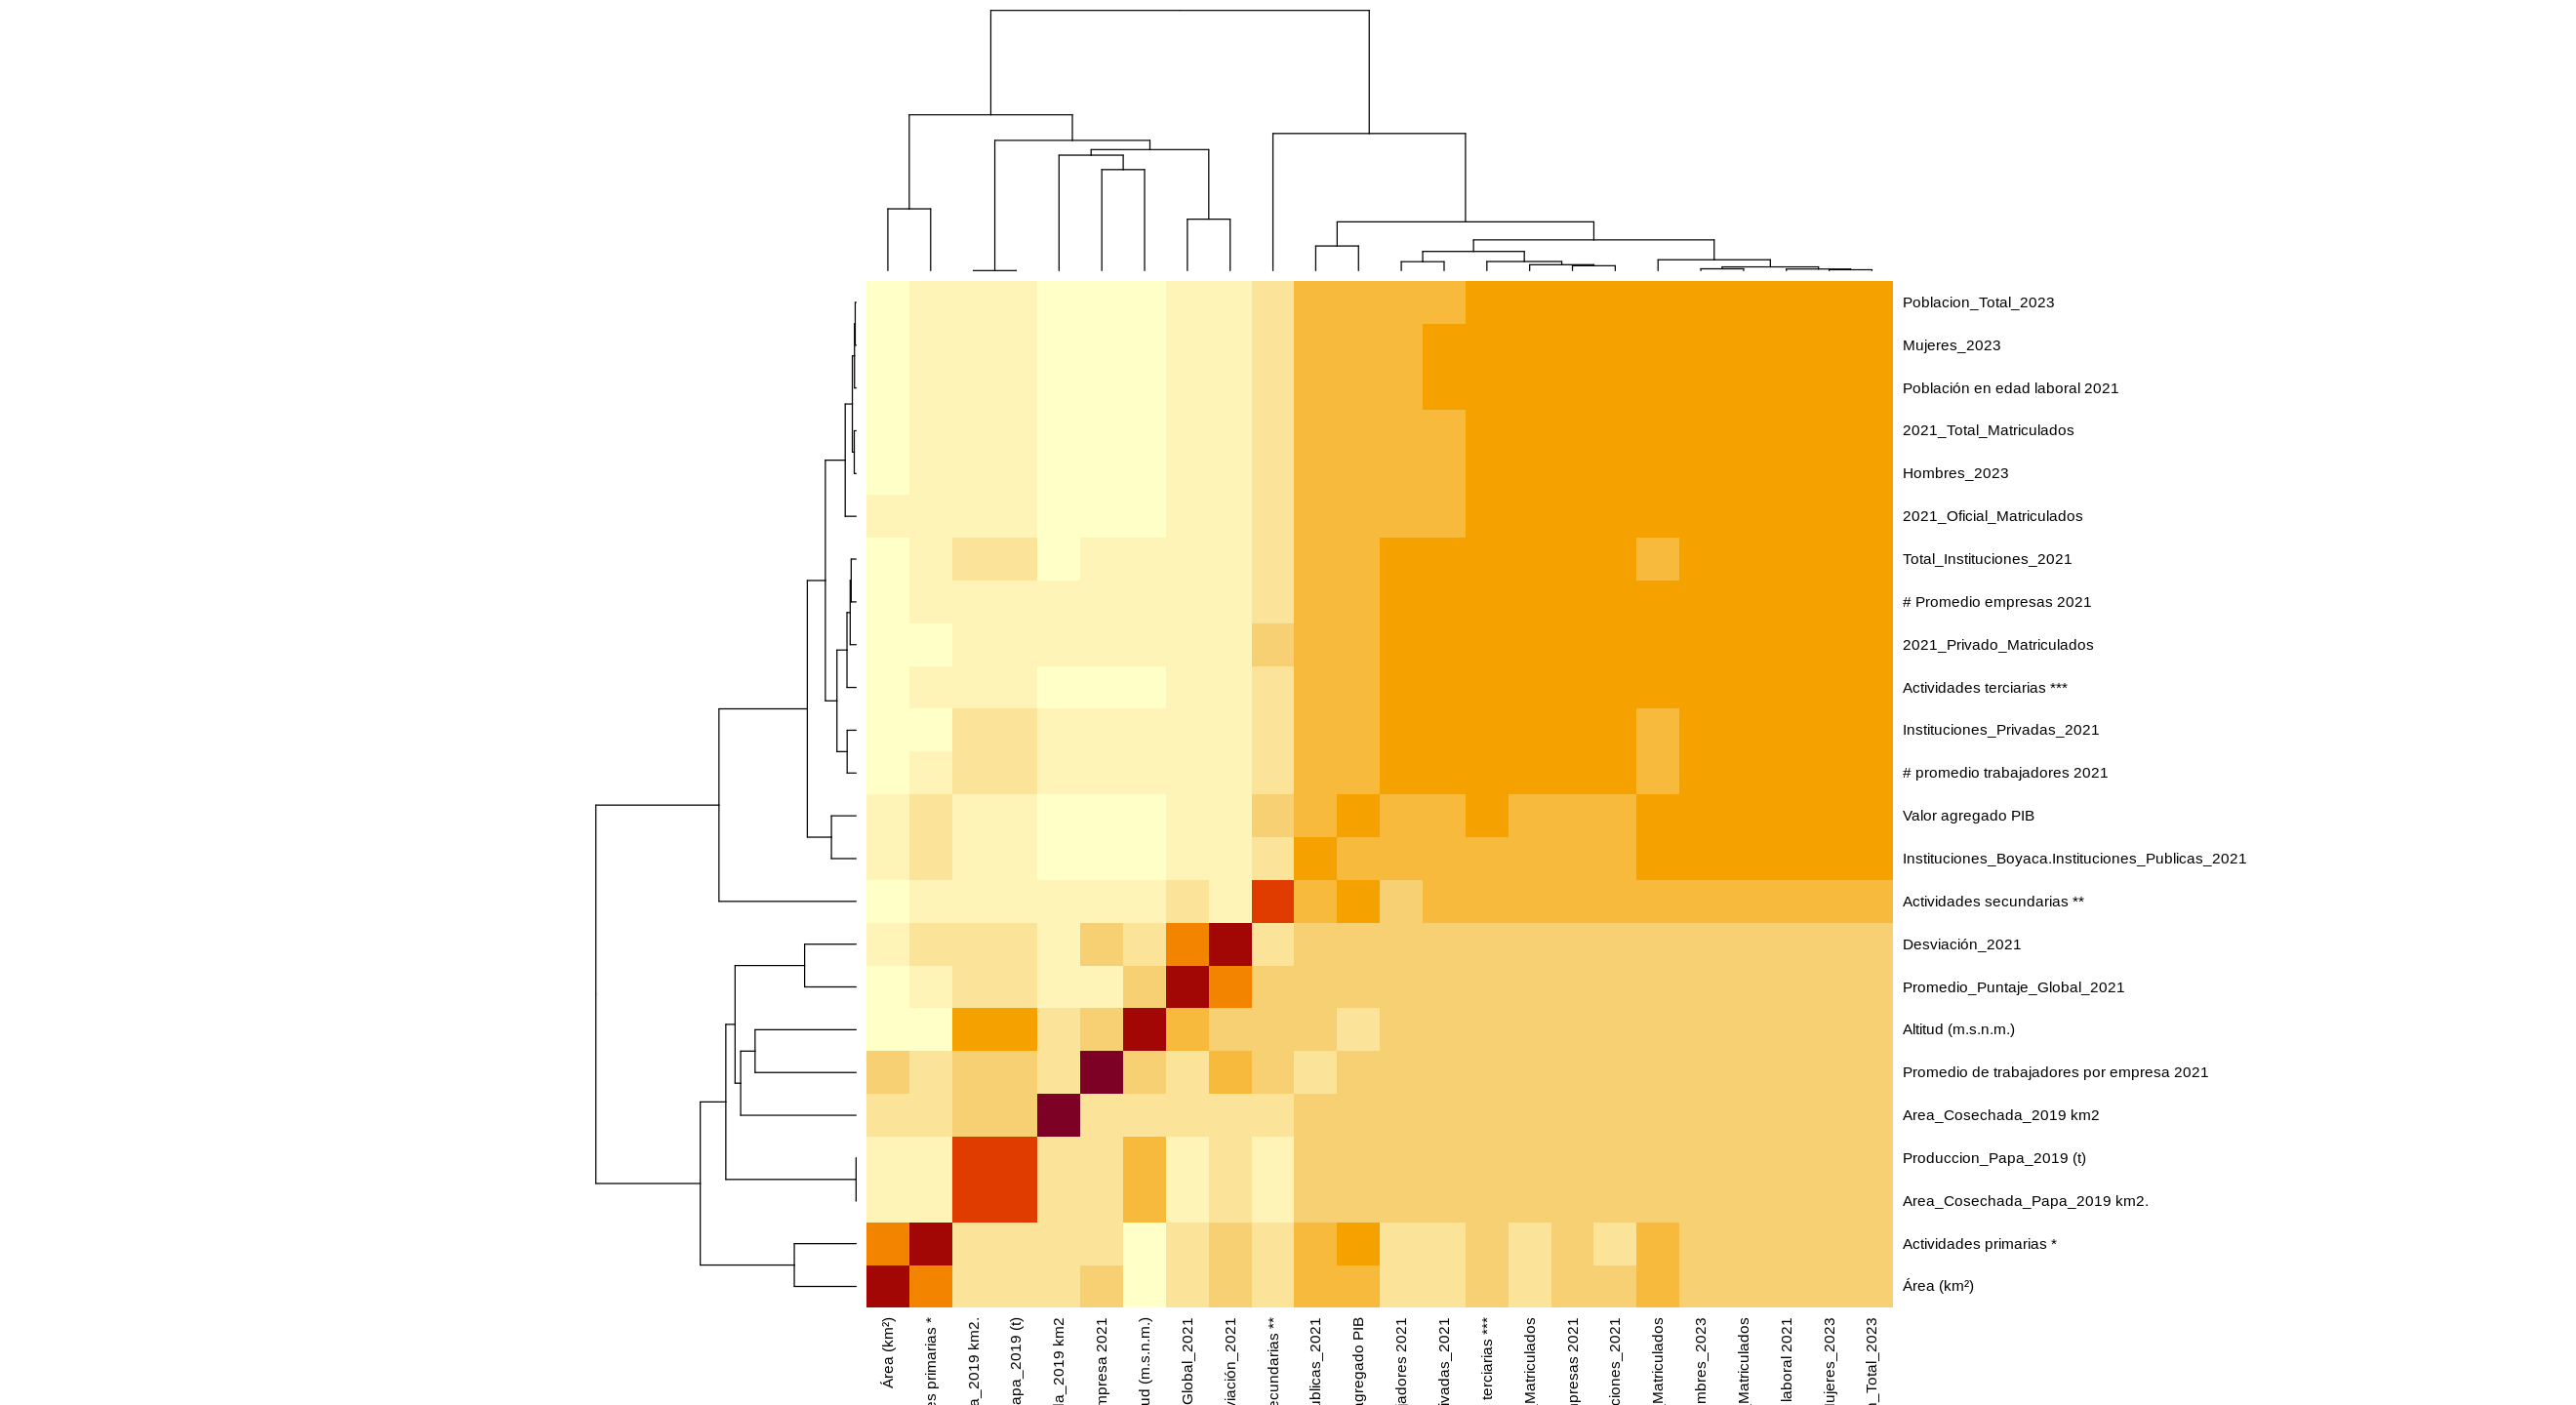

In [ ]:
heatmap(corrmatrix)

In [ ]:
library("FactoMineR")
library("factoextra")
library(reshape2)
library(RColorBrewer)

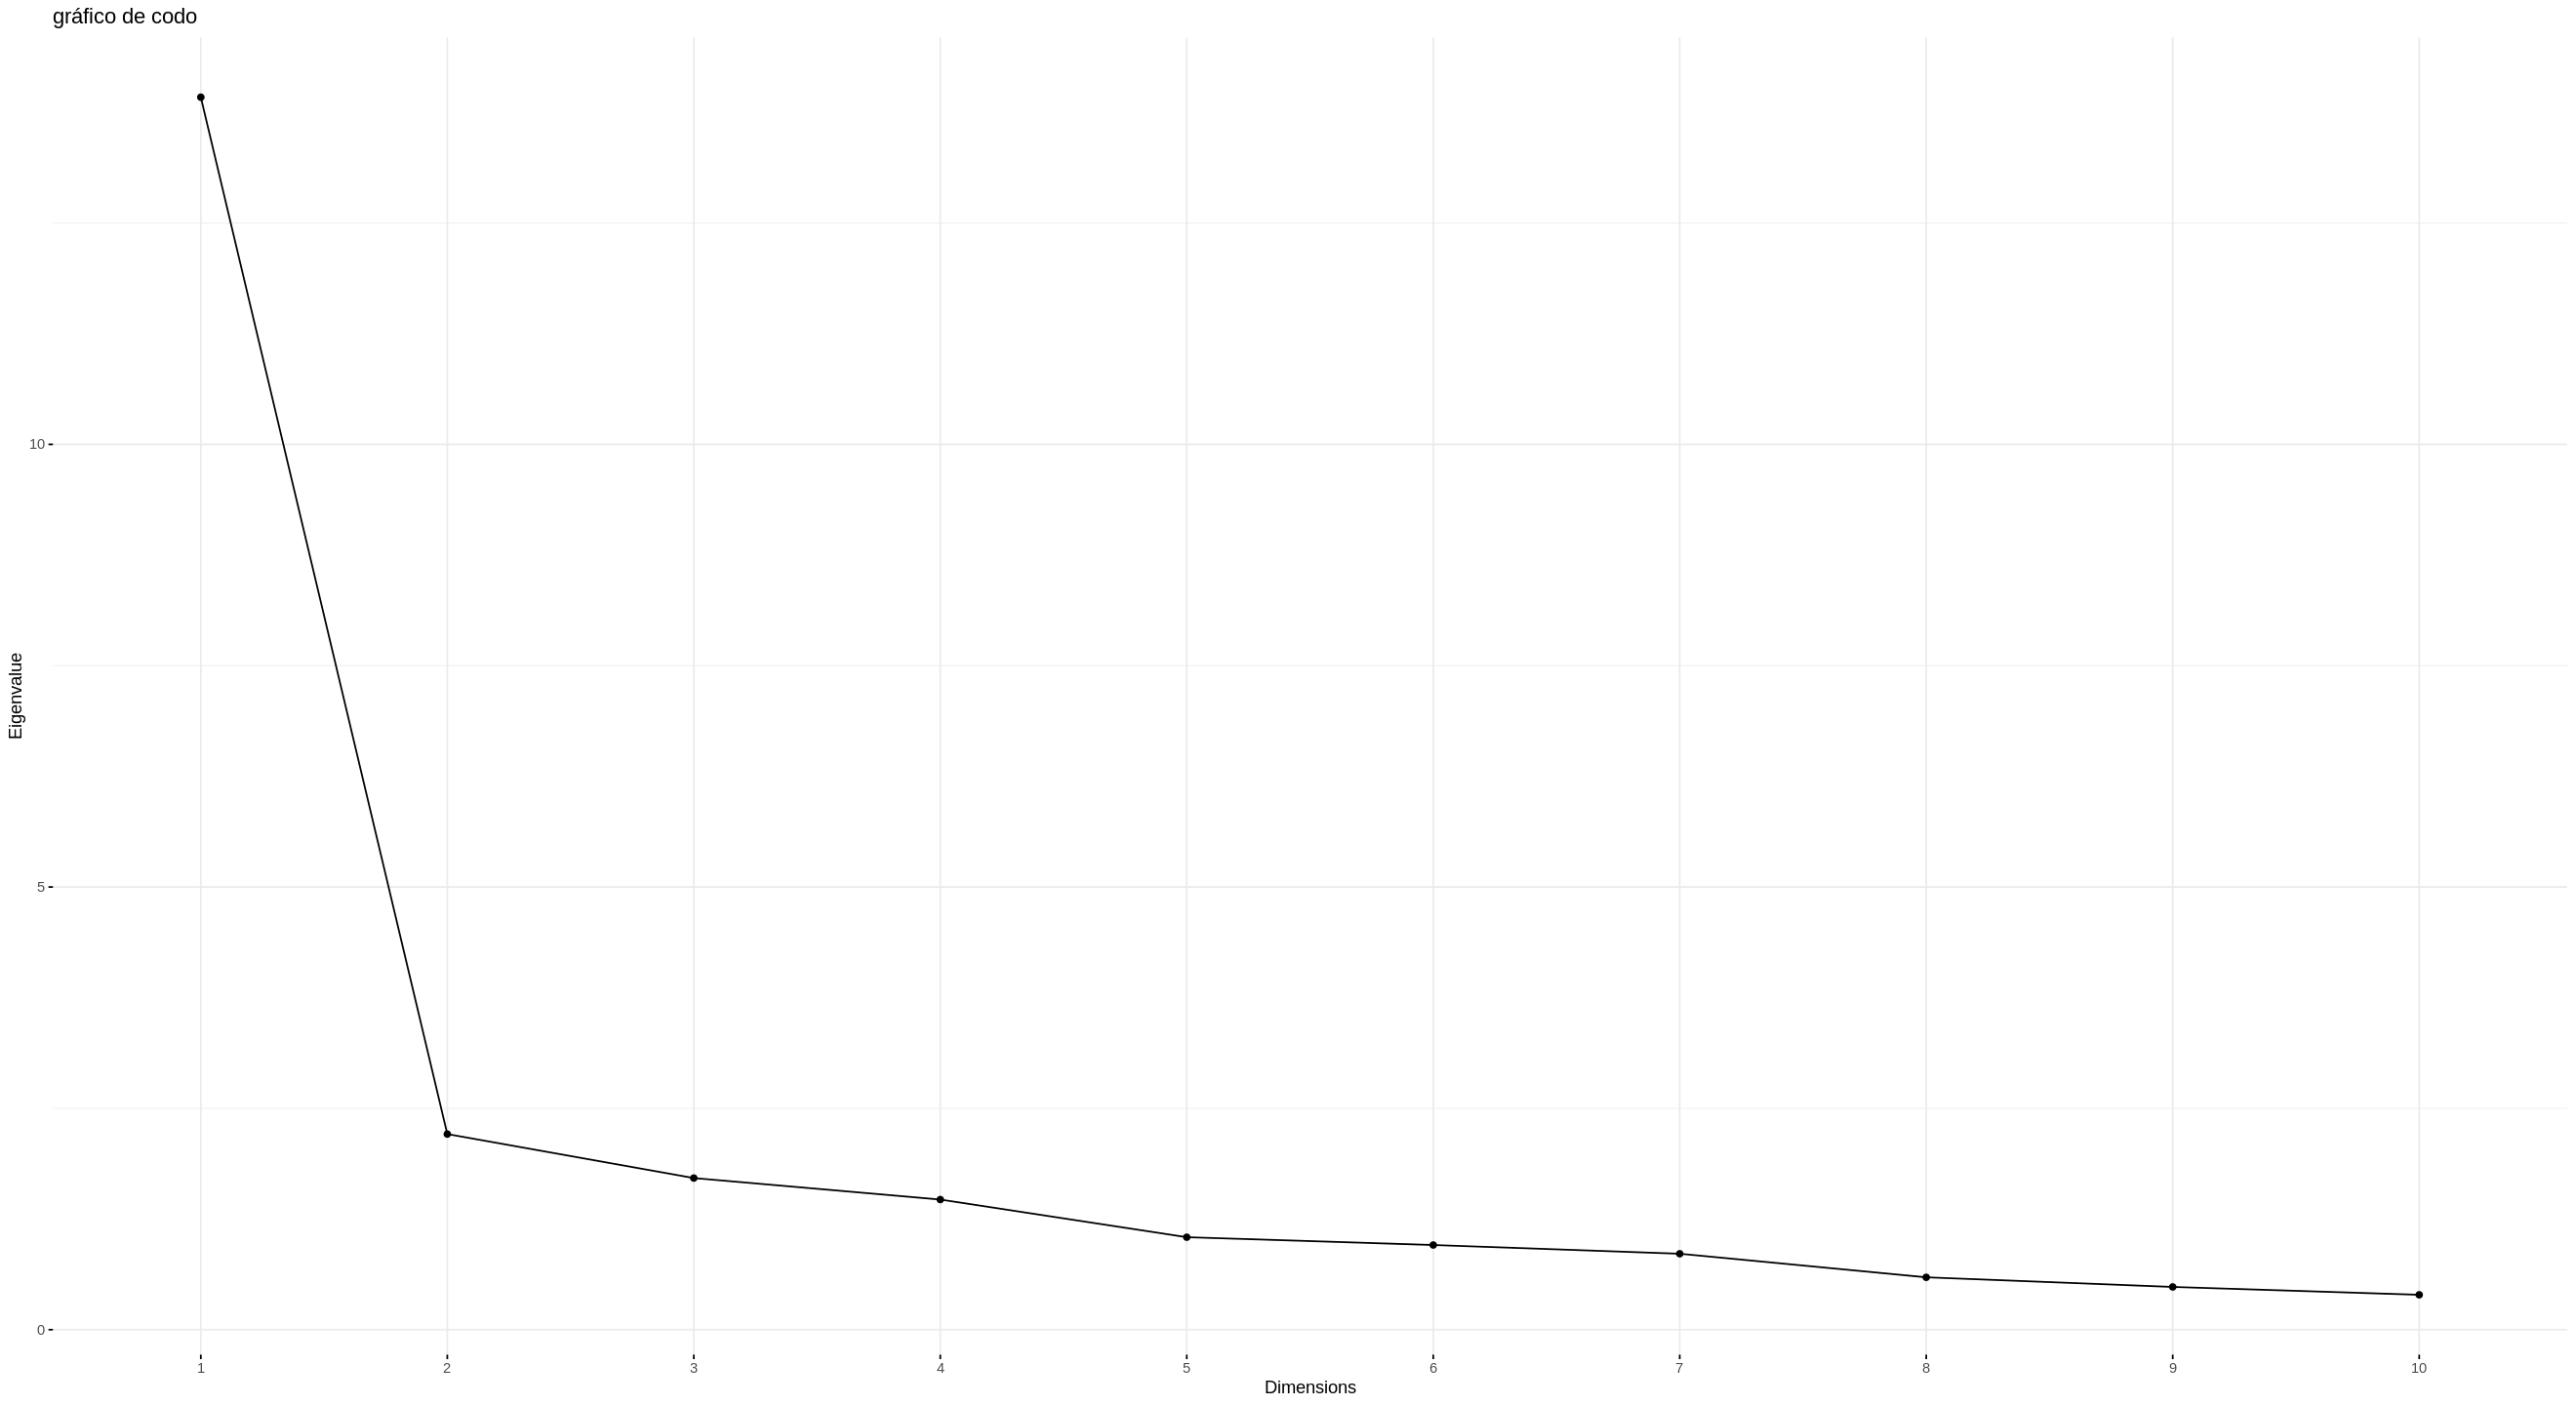

In [ ]:
BoyFact<-PCA(Boyacaf,ncp=6, graph=FALSE)
#gráfico de codo
fviz_eig(BoyFact,choice="eigenvalue",geom="line", title="gráfico de codo")

In [ ]:
componentes<-prcomp(Boyacaf[,1:24],center=TRUE, scale.=TRUE)
summary(componentes)

Importance of components:
                         PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.731 1.48632 1.30857 1.21226 1.02190 0.97780 0.92601
Proportion of Variance 0.580 0.09205 0.07135 0.06123 0.04351 0.03984 0.03573
Cumulative Proportion  0.580 0.67209 0.74343 0.80467 0.84818 0.88801 0.92374
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.76891 0.6946 0.62765 0.48378 0.25774 0.18522 0.11721
Proportion of Variance 0.02463 0.0201 0.01641 0.00975 0.00277 0.00143 0.00057
Cumulative Proportion  0.94838 0.9685 0.98490 0.99465 0.99742 0.99885 0.99942
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.08417 0.06363 0.04704 0.02269 0.009529 0.002235
Proportion of Variance 0.00030 0.00017 0.00009 0.00002 0.000000 0.000000
Cumulative Proportion  0.99971 0.99988 0.99997 1.00000 1.000000 1.000000
                            PC21     PC22      PC23      PC24


In [ ]:
componentes<-prcomp(Boyacaf, center=TRUE, scale.=TRUE, rank.=4)
print(componentes)

Standard deviations (1, .., p=24):
 [1] 3.731070e+00 1.486324e+00 1.308570e+00 1.212258e+00 1.021902e+00
 [6] 9.777953e-01 9.260122e-01 7.689092e-01 6.946366e-01 6.276538e-01
[11] 4.837809e-01 2.577412e-01 1.852191e-01 1.172103e-01 8.416783e-02
[16] 6.362549e-02 4.703543e-02 2.268879e-02 9.528683e-03 2.234708e-03
[21] 3.754058e-16 2.250095e-16 1.562704e-16 6.263930e-17

Rotation (n x k) = (24 x 4):
                                                        PC1          PC2
Altitud (m.s.n.m.)                               0.03158691 -0.455269422
Área (km²)                                       0.02012902  0.349905149
Poblacion_Total_2023                             0.26638791  0.034577479
Hombres_2023                                     0.26625565  0.036557298
Mujeres_2023                                     0.26641040  0.032770542
Valor agregado PIB                               0.24669557  0.138077313
Actividades terciarias ***                       0.26316803  0.024905608
Actividades se

Using medicion as id variables



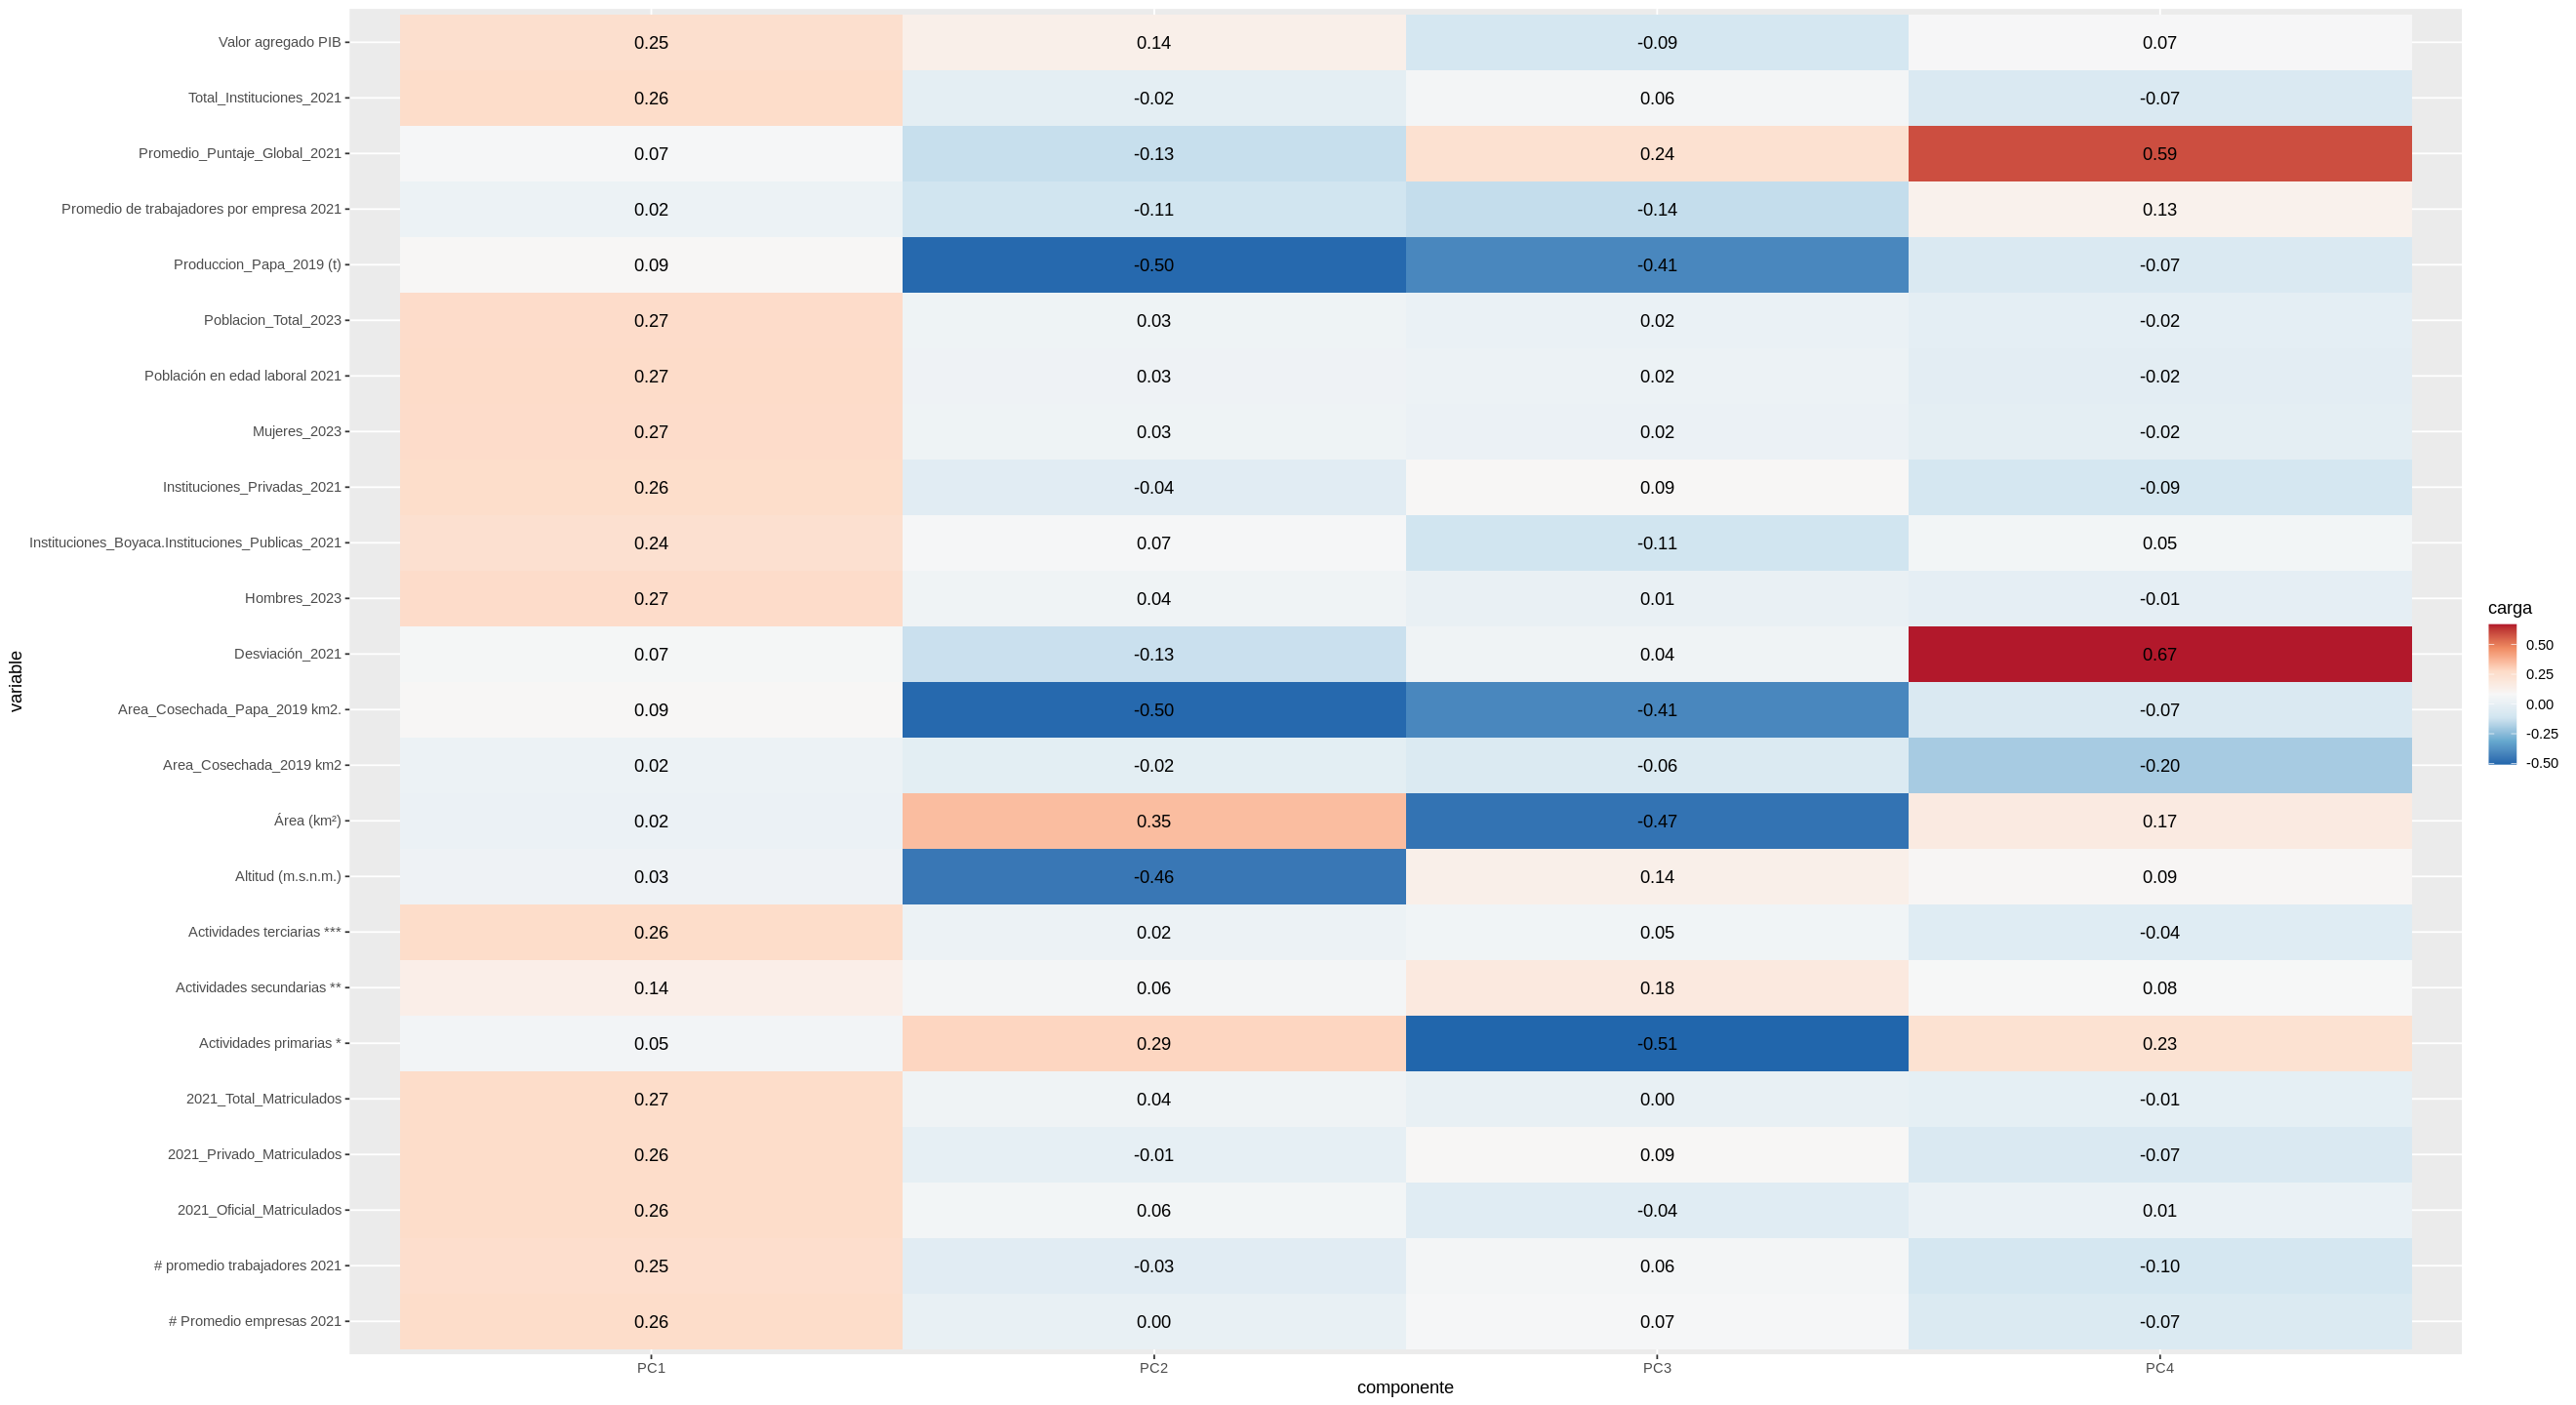

In [ ]:
library(reshape2)
library(ggplot2)
cargas<-componentes$rotation
cargasdf<-as.data.frame(cargas)
cargasdf$medicion<-rownames(cargasdf)
cargasheat<-reshape2::melt(cargasdf)
colnames(cargasheat)<-c("variable","componente","carga")
library(ggplot2)
ggplot(cargasheat,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

In [ ]:
library(psych)
componentes2<-principal(Boyacaf,nfactors=4,rotate="varimax")
componentes2$communality
componentes2$loadings

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”
Warning message in principal(Boyacaf, nfactors = 4, rotate = "varimax"):
“The matrix is not positive semi-definite, scores found from Structure loadings”


Altitud (m.s.n.m.) 
                                      0.51697185 
                                      Área (km²) 
                                      0.69524772 
                            Poblacion_Total_2023 
                                      0.99130579 
                                    Hombres_2023 
                                      0.99021651 
                                    Mujeres_2023 
                                      0.99172323 
                              Valor agregado PIB 
                                      0.91291234 
                      Actividades terciarias *** 
                                      0.97182606 
                      Actividades secundarias ** 
                                      0.35189341 
                         Actividades primarias * 
                                      0.74128713 
                        # Promedio empresas 2021 
                                      0.97244892 
                    # promedio trabajadores 2021 
                                      0.90759816 
       Promedio de trabajadores por empresa 2021 
                                      0.09394289 
                  Población en edad laboral 2021 
                                      0.99320832 
                         Area_Cosechada_2019 km2 
                                      0.07267058 
                   Area_Cosechada_Papa_2019 km2. 
                                      0.95317495 
                        Produccion_Papa_2019 (t) 
                                      0.95317495 
Instituciones_Boyaca.Instituciones_Publicas_2021 
                                      0.83454474 
                     Instituciones_Privadas_2021 
                                      0.96015491 
                        Total_Instituciones_2021 
                                      0.98076614 
                       2021_Oficial_Matriculados 
                                      0.97463044 
                       2021_Privado_Matriculados 
                                      0.98794304 
                         2021_Total_Matriculados 
                                      0.98979930 
                    Promedio_Puntaje_Global_2021 
                                      0.71679370 
                                 Desviación_2021 
                                      0.75773324


Loadings:
                                                 RC1    RC2    RC3    RC4   
Altitud (m.s.n.m.)                                       0.444 -0.512  0.235
Área (km²)                                                      0.833       
Poblacion_Total_2023                              0.986  0.114              
Hombres_2023                                      0.985  0.117              
Mujeres_2023                                      0.987  0.112              
Valor agregado PIB                                0.904         0.289       
Actividades terciarias ***                        0.981                     
Actividades secundarias **                        0.553 -0.116         0.168
Actividades primarias *                           0.130  0.113  0.841       
# Promedio empresas 2021                          0.980  0.104              
# promedio trabajadores 2021                      0.938  0.147              
Promedio de trabajadores por empresa 2021                0.266   

Using medicion as id variables



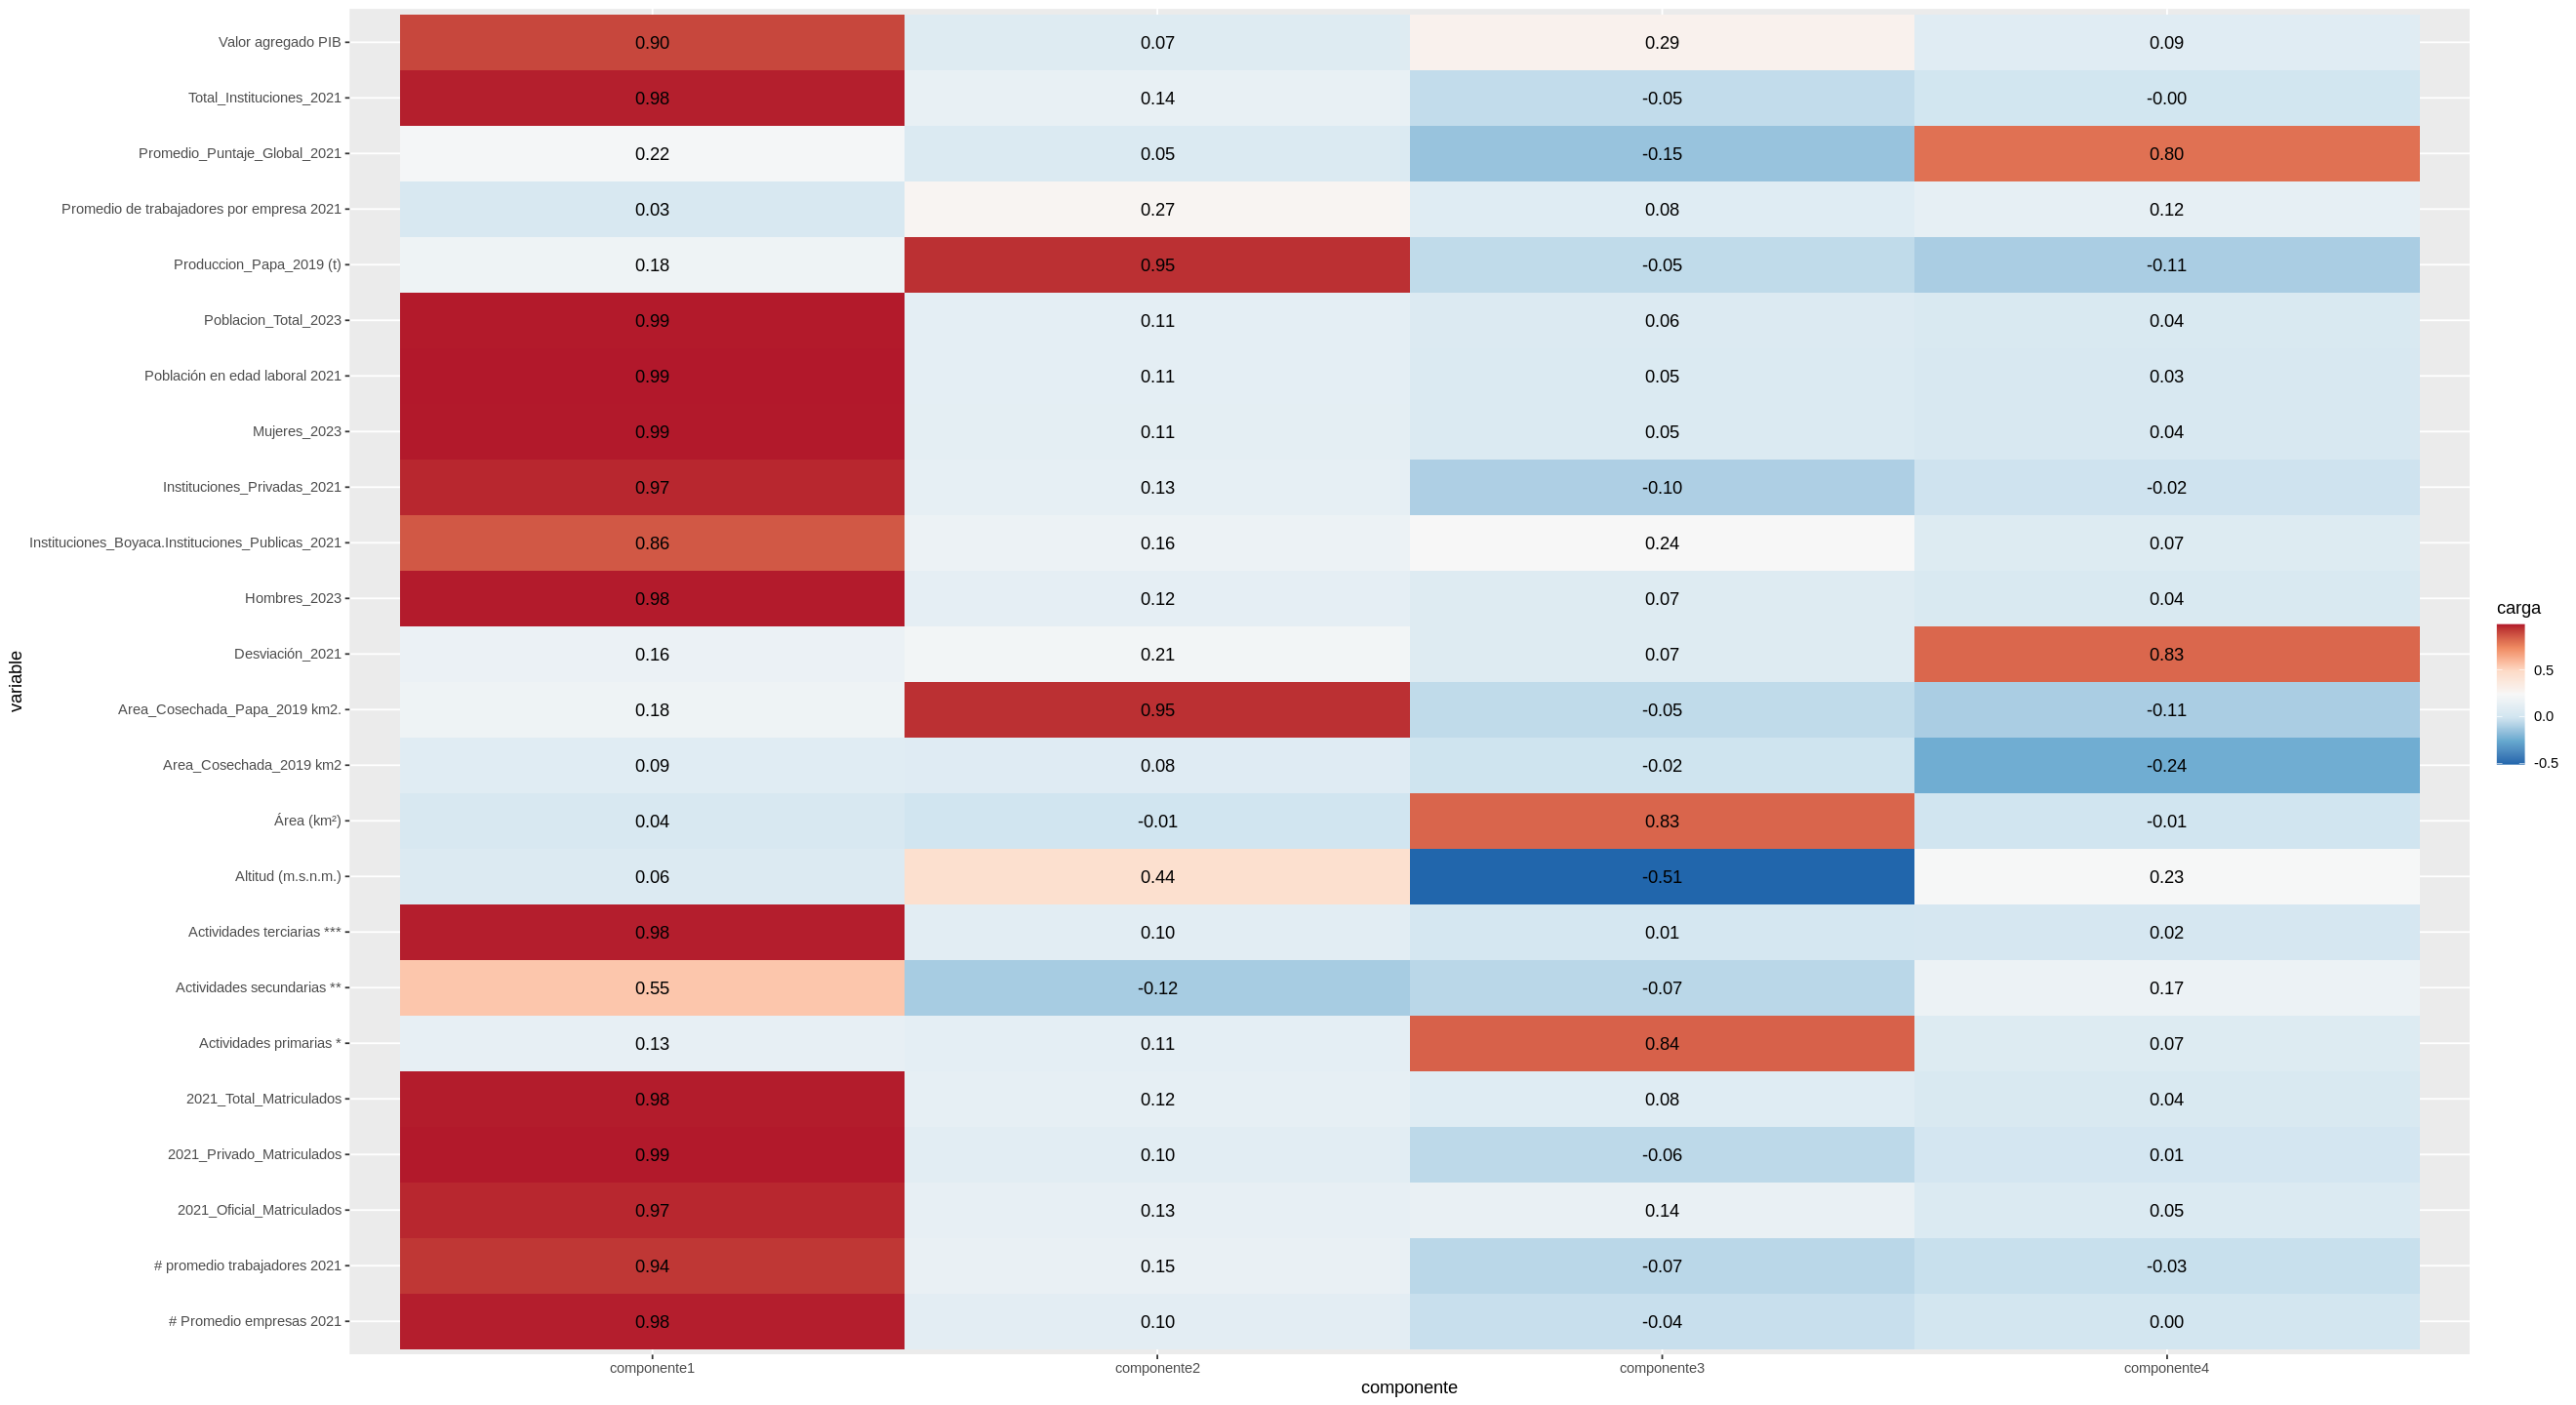

In [ ]:
componente1<-componentes2$loadings[,1]
componente2<-componentes2$loadings[,2]
componente3<-componentes2$loadings[,3]
componente4<-componentes2$loadings[,4]

cargasdfr<-as.data.frame(cbind(componente1,componente2, componente3, componente4))
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

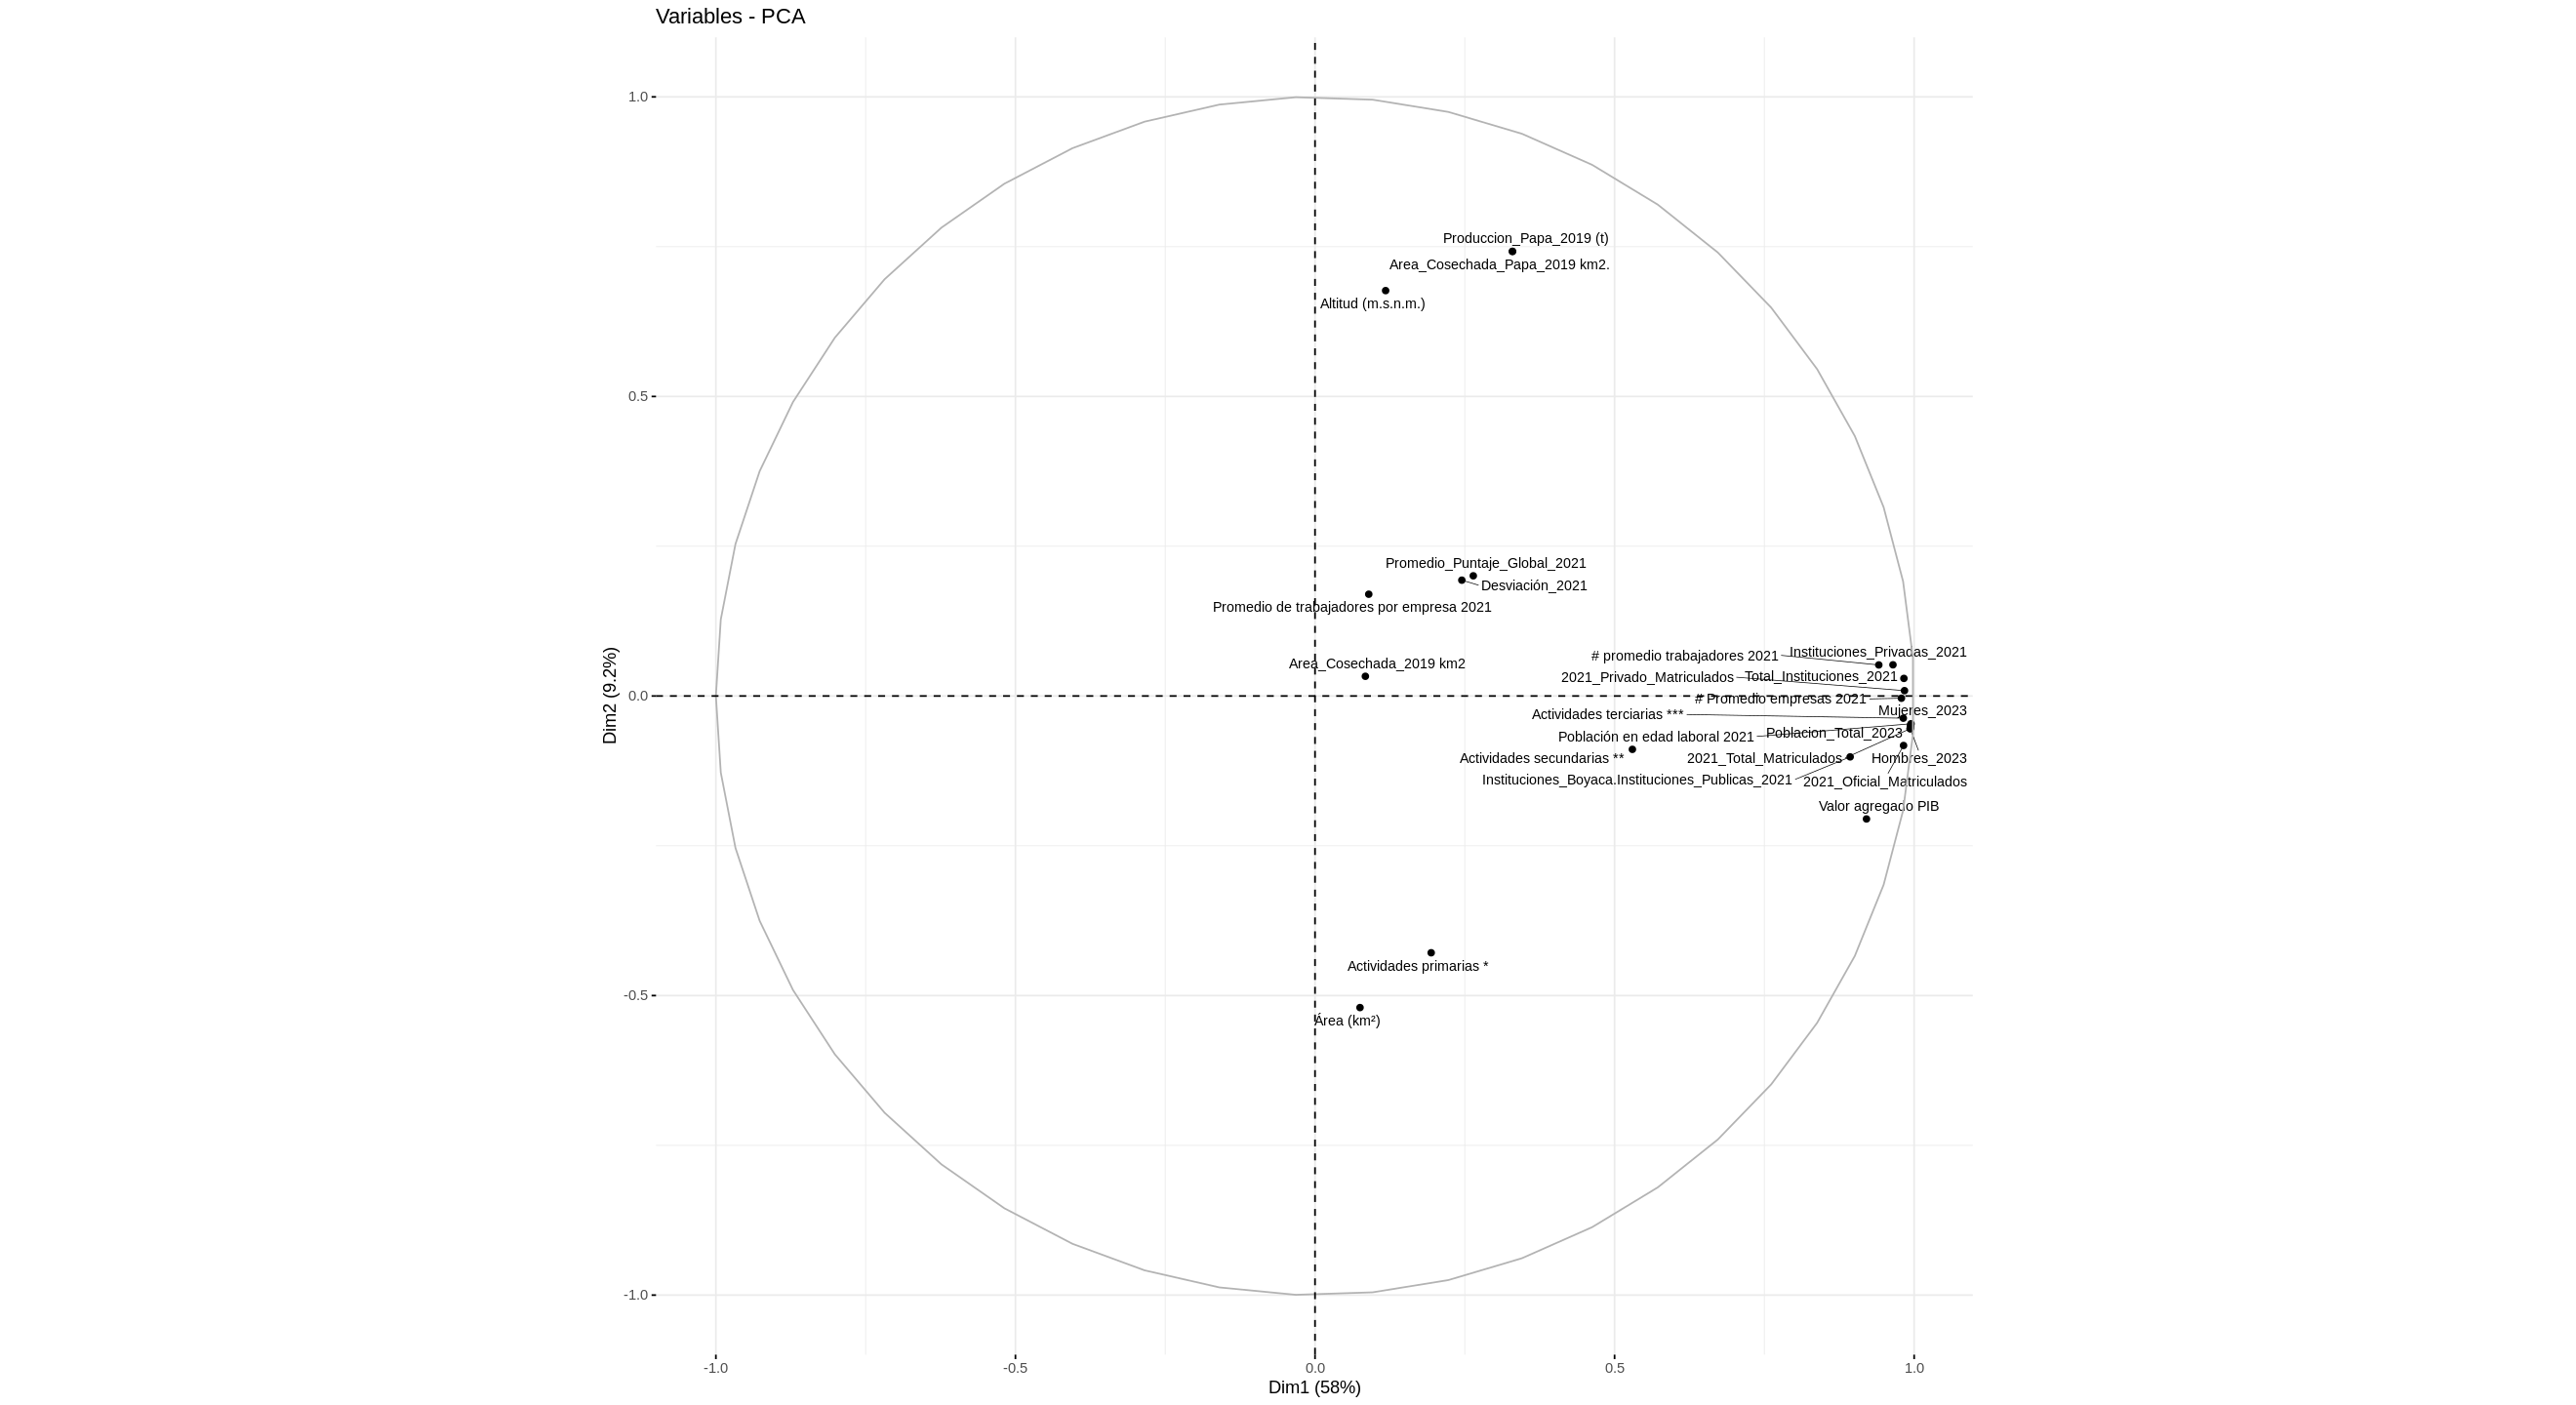

In [ ]:
fviz_pca_var(BoyFact, geom =c("point","text"), repel=TRUE, labelsize=3)

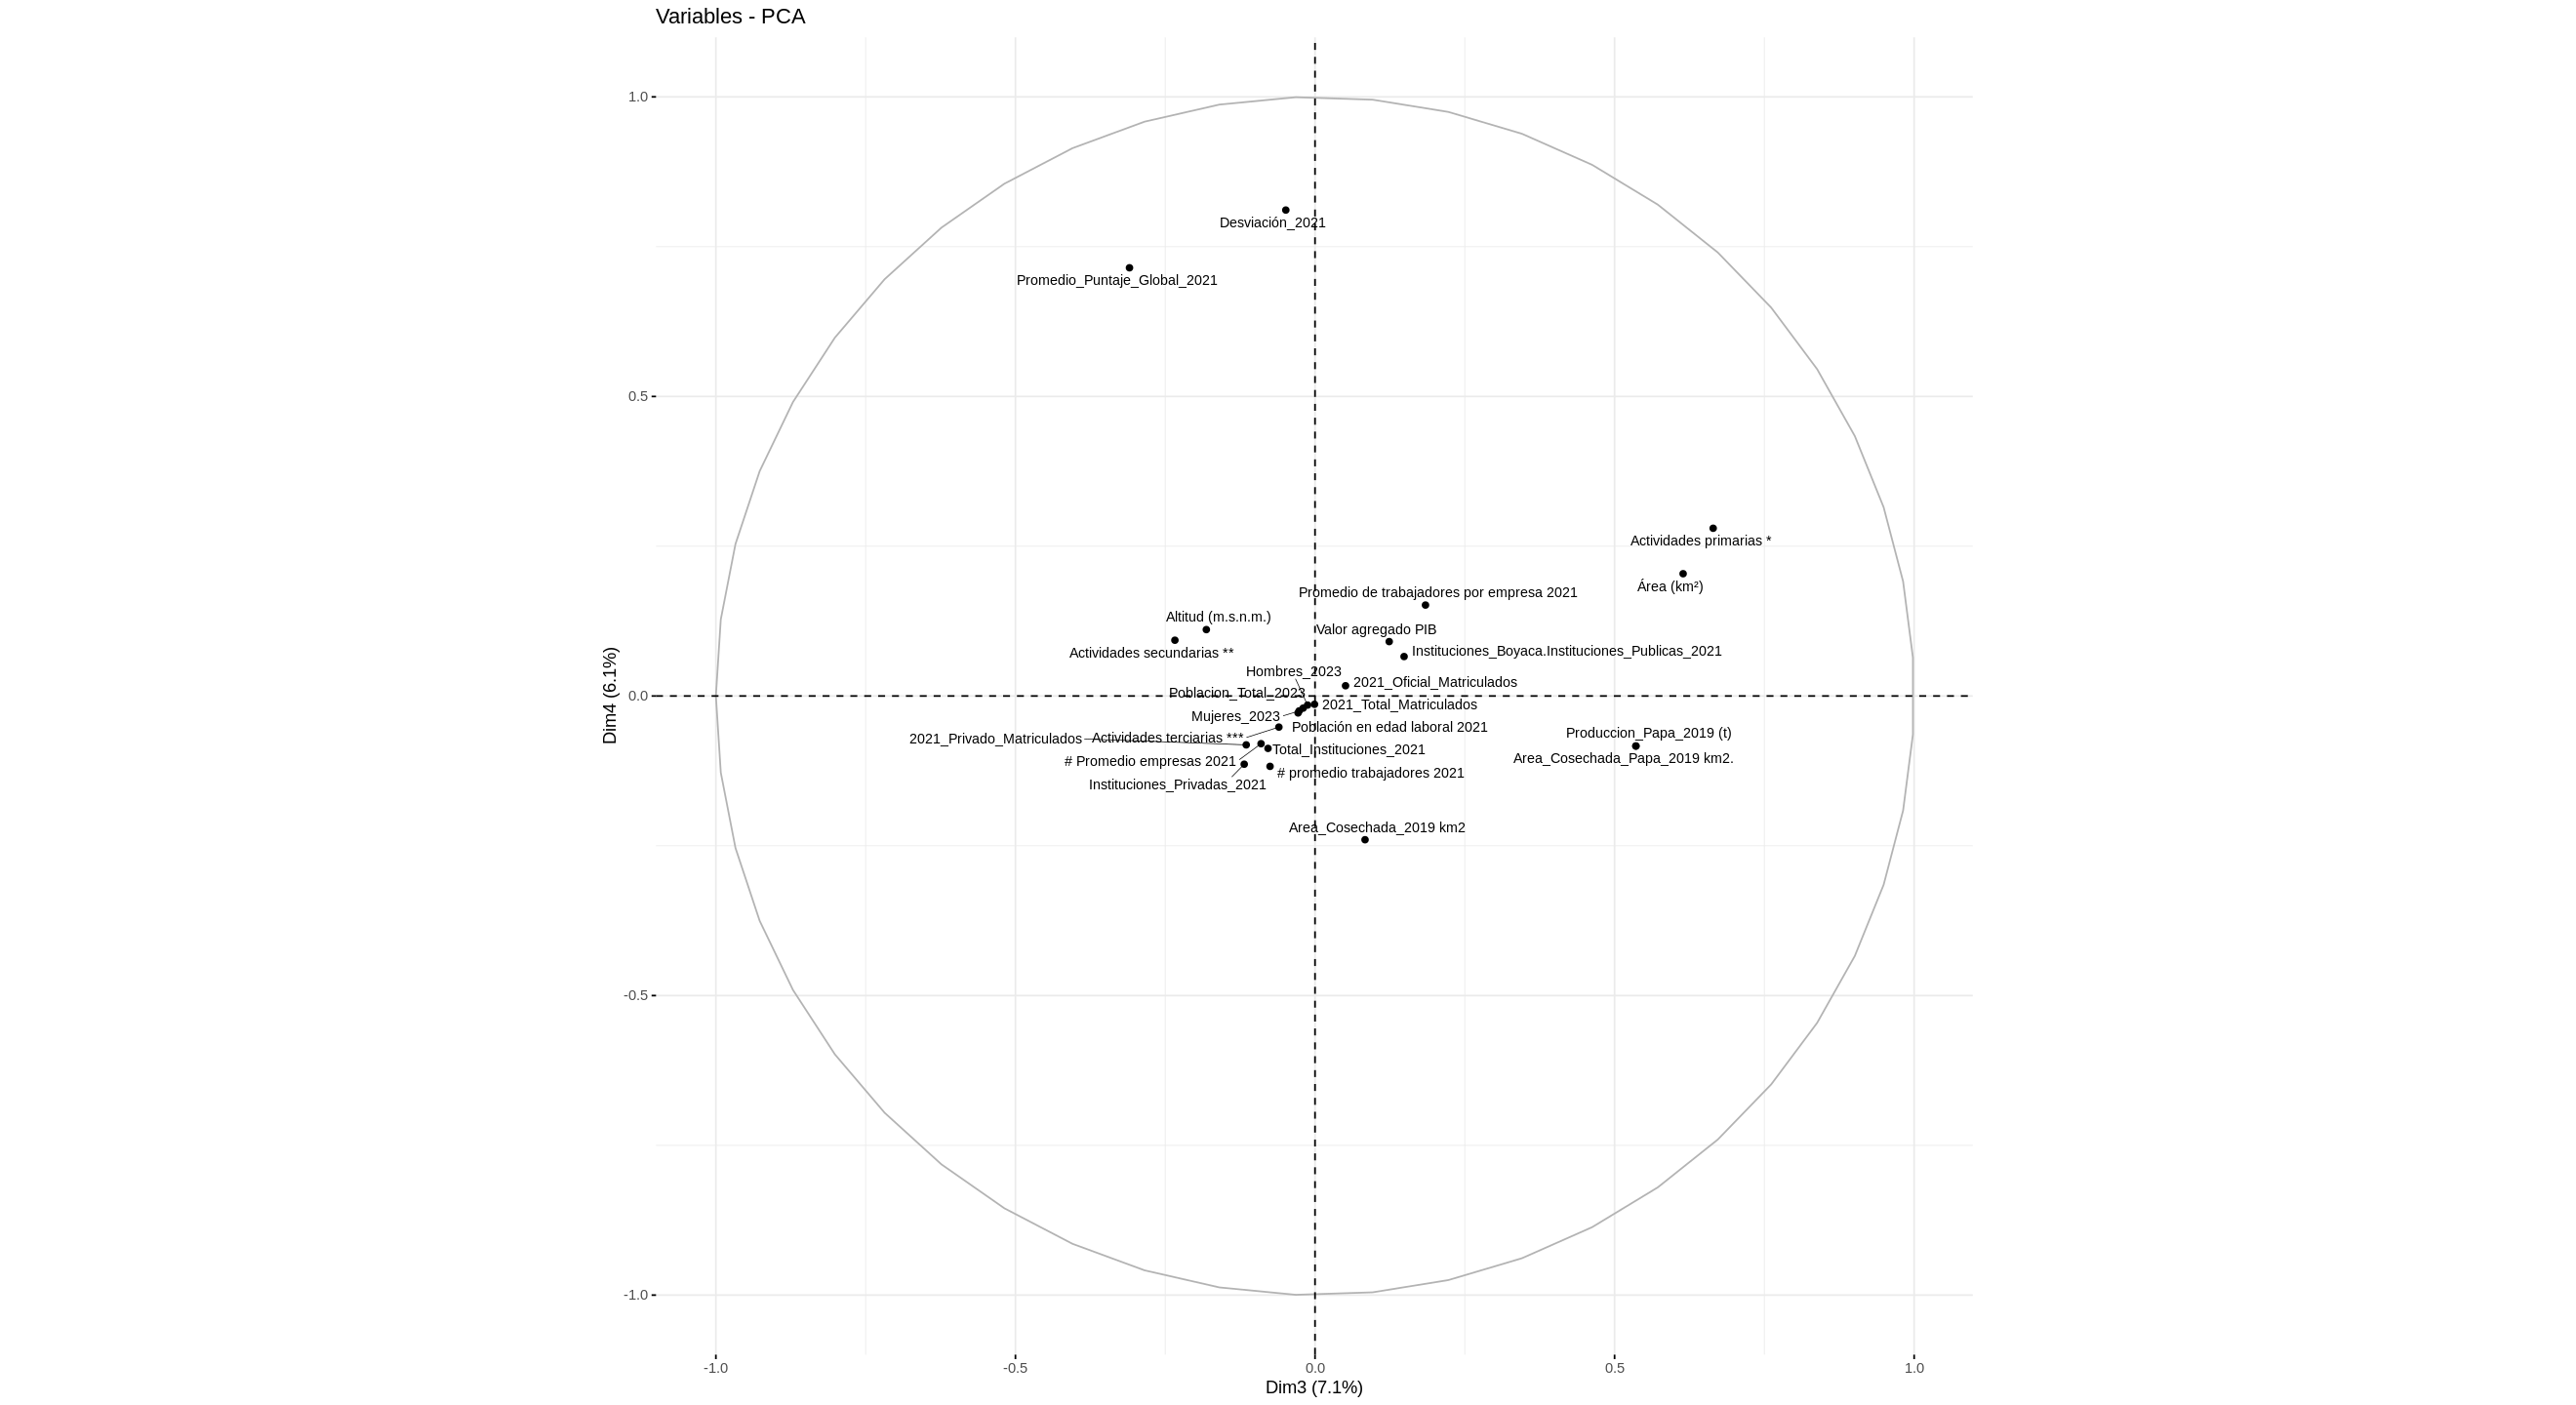

In [ ]:
fviz_pca_var(BoyFact,axes=c(3,4), geom =c("point","text"),repel=TRUE, labelsize=3)

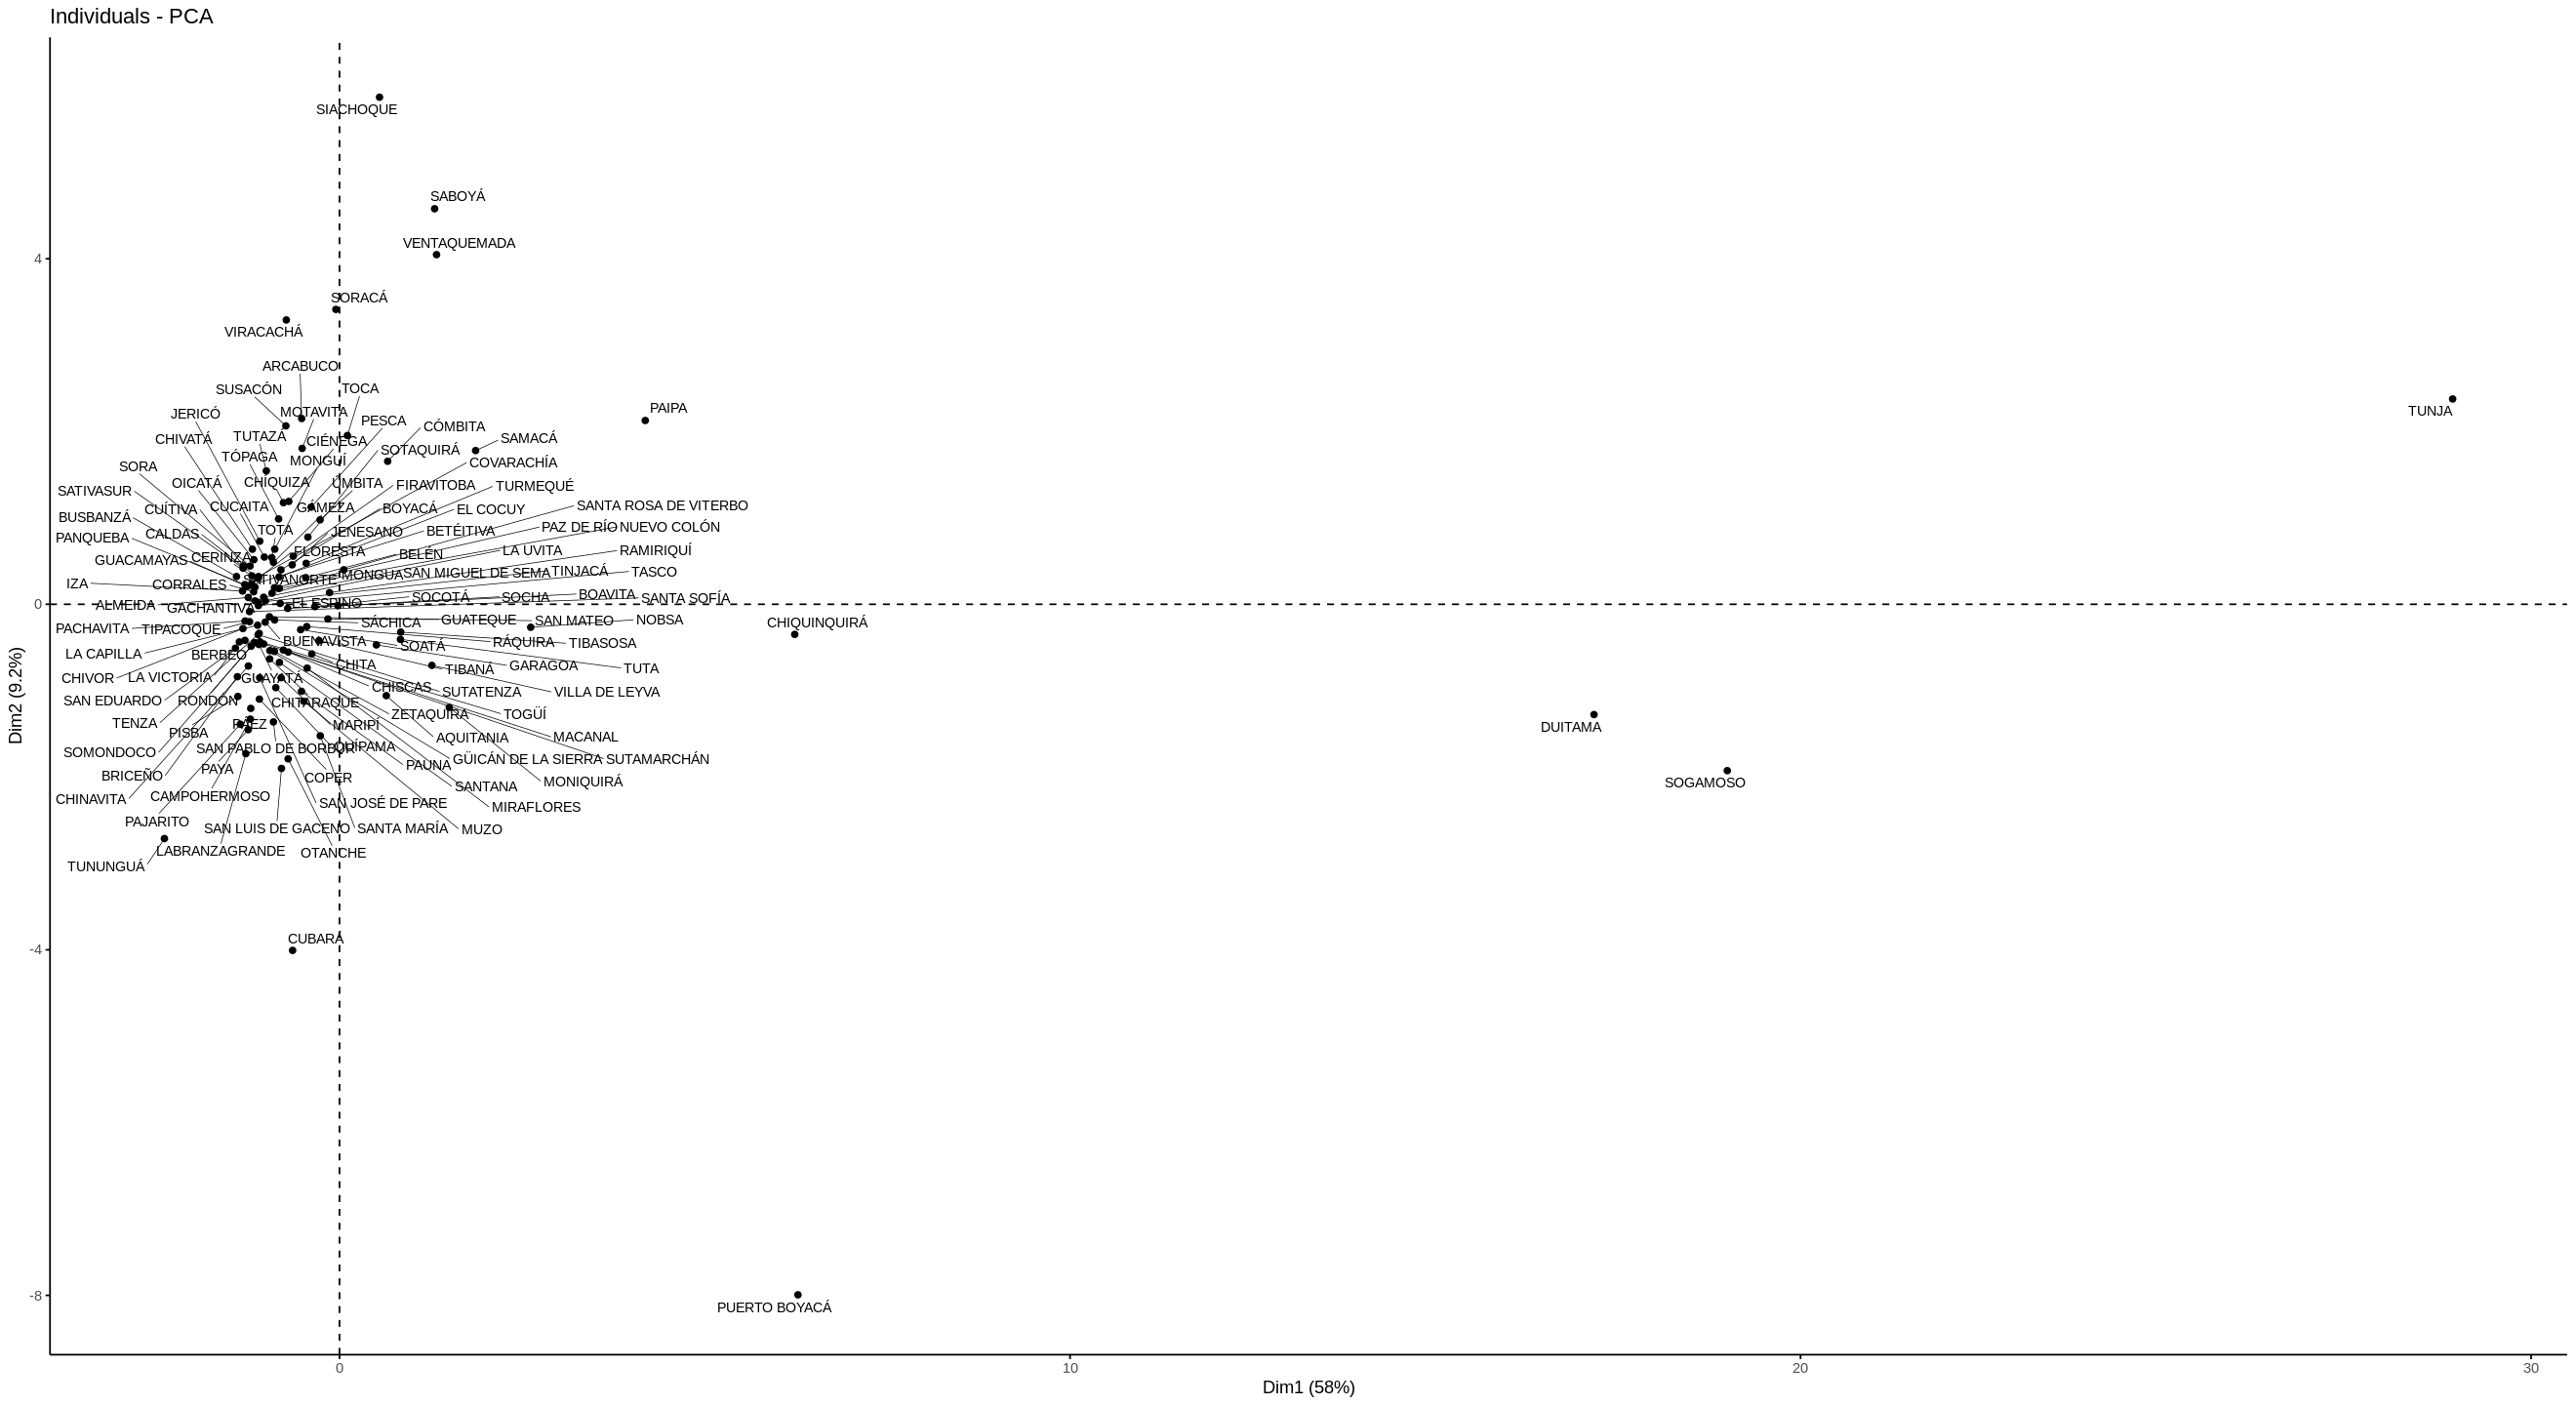

In [ ]:
fviz_pca_ind(BoyFact, ggtheme=theme_classic(), repel=TRUE, labelsize=3)

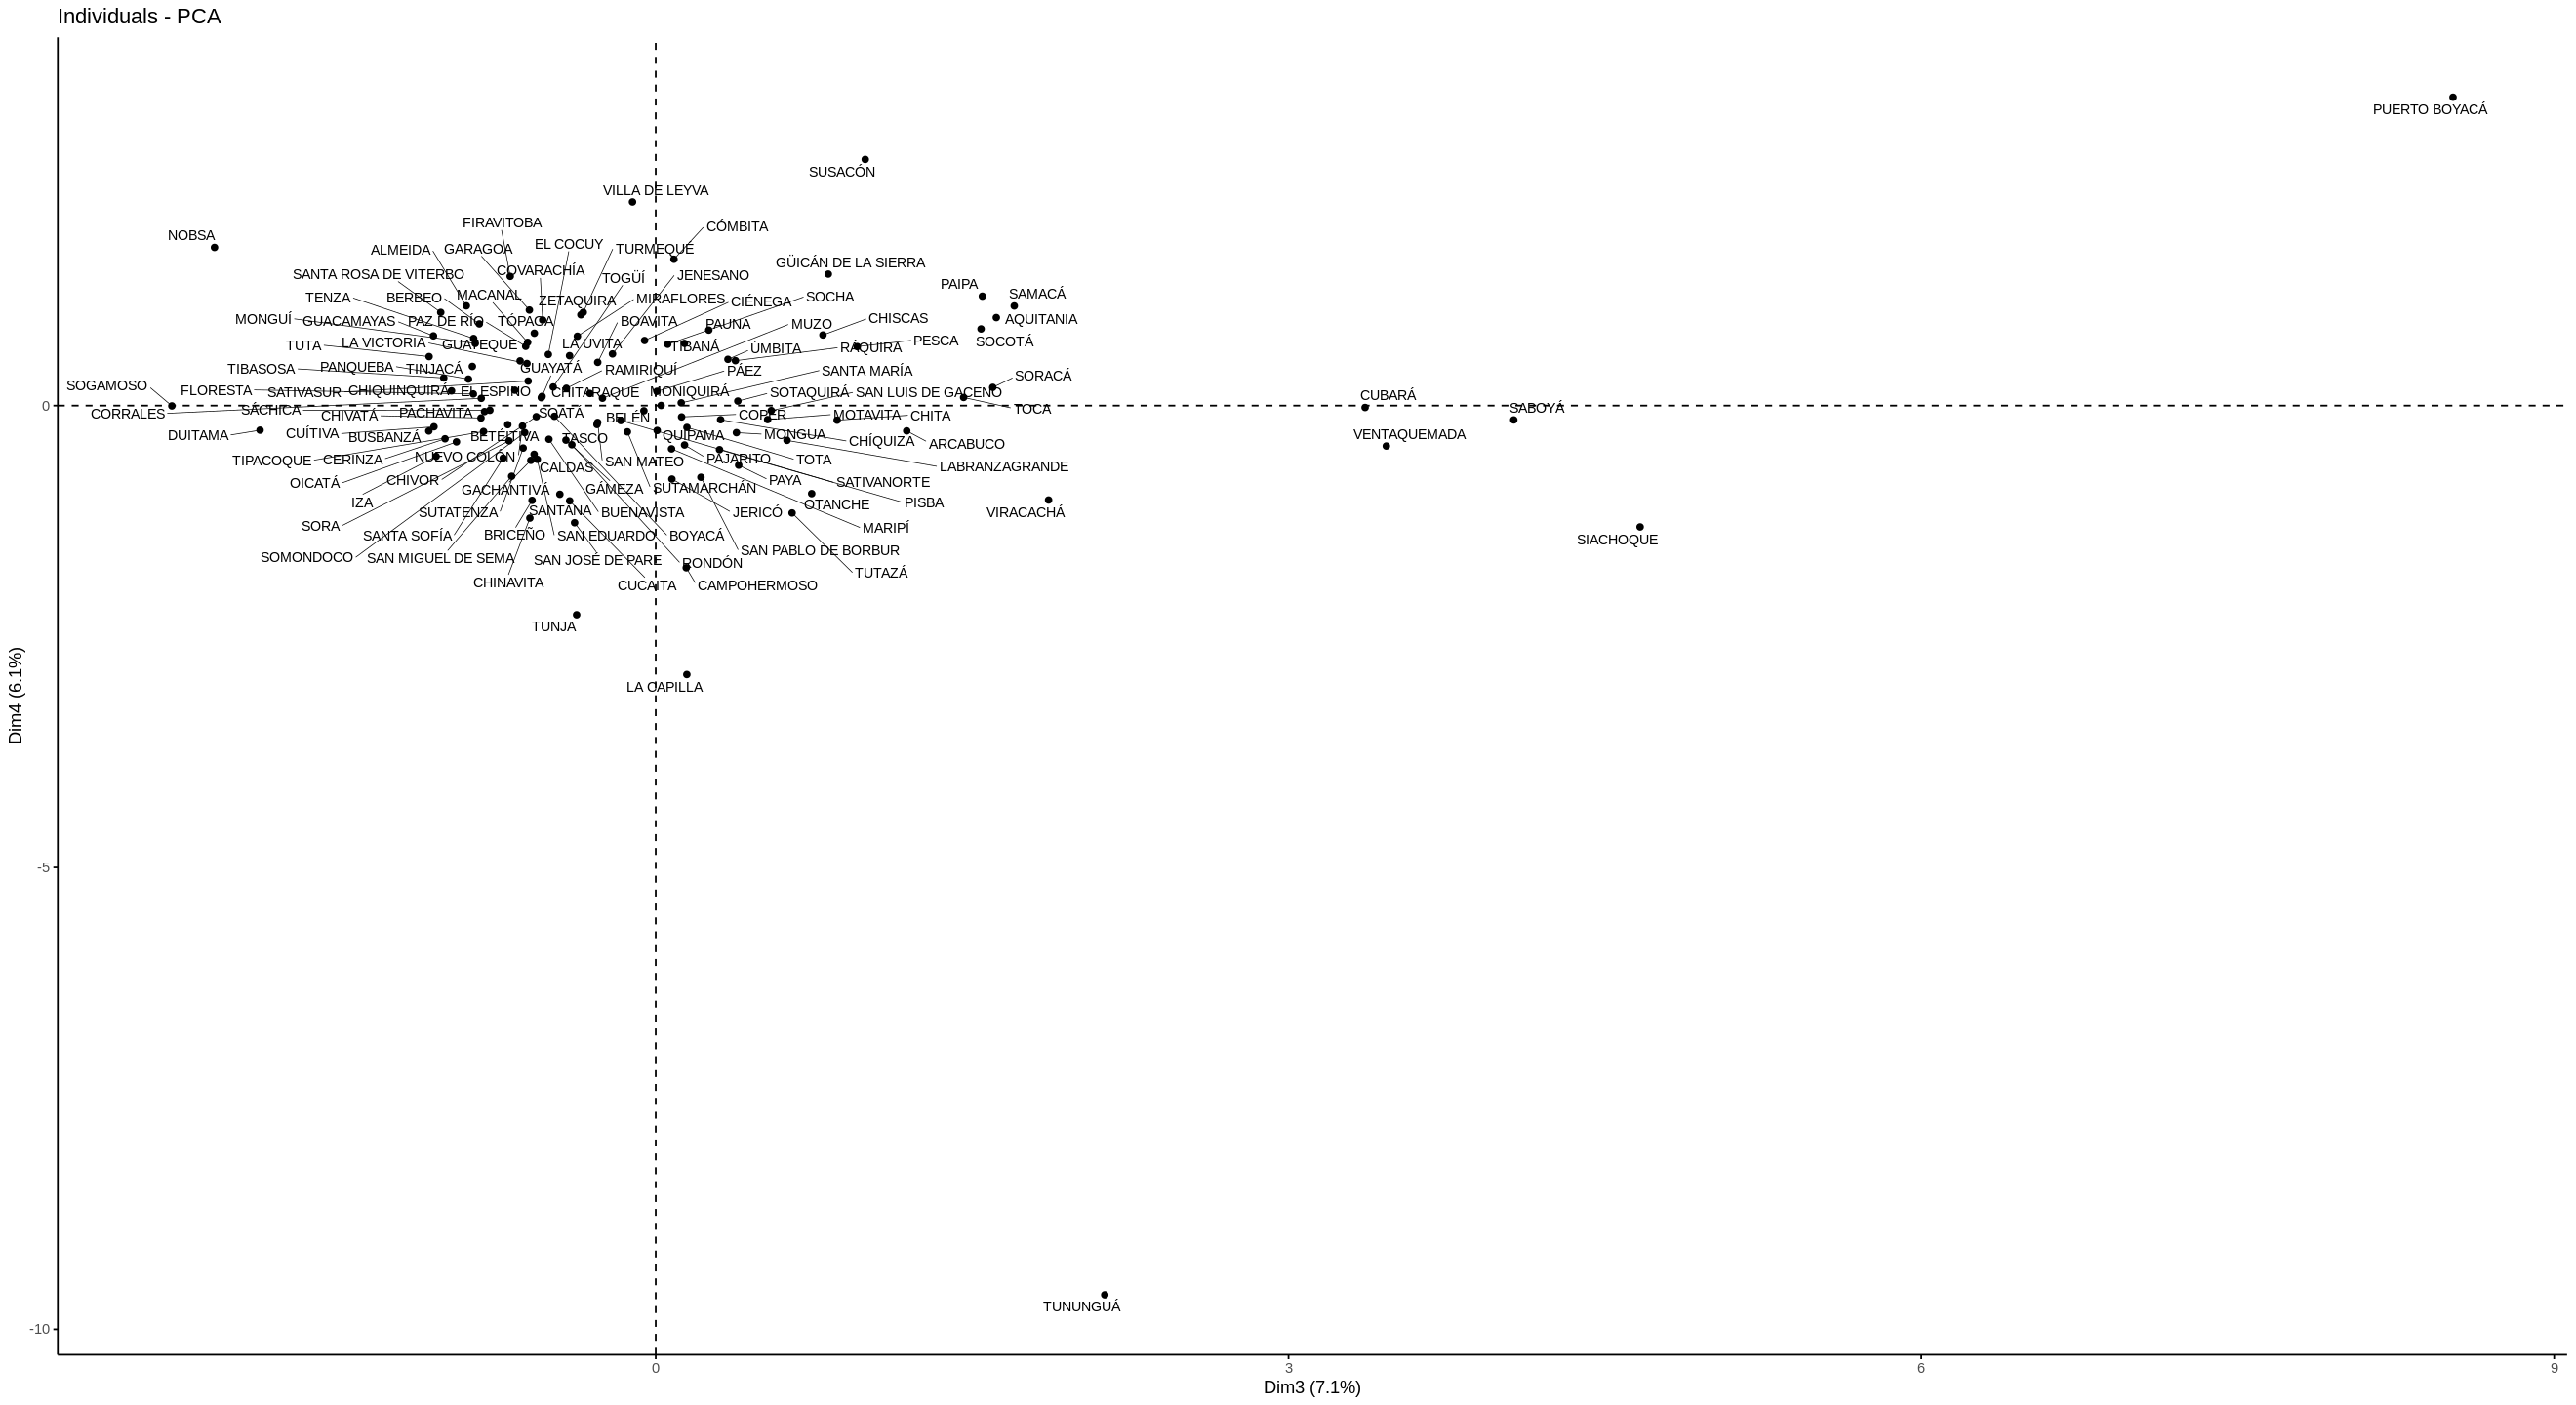

In [ ]:
fviz_pca_ind(BoyFact, axes=c(3,4),ggtheme=theme_classic(), repel=TRUE, labelsize=3)

In [ ]:
library(sf)

# Ruta al archivo shapefile
shp_path <- '/content/MGN_MPIO_POLITICO.shp'

# Leer el archivo shapefile
sf <- st_read(shp_path)

# Filtrar los municipios de Boyacá
sf <- sf[sf$DPTO_CNMBR == "BOYACÁ", ]

# Convertir los caracteres a UTF-8
sf$MPIO_CNMBR <- enc2utf8(sf$MPIO_CNMBR)


Reading layer `MGN_MPIO_POLITICO' from data source 
  `/content/MGN_MPIO_POLITICO.shp' using driver `ESRI Shapefile'
Simple feature collection with 1121 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -81.73562 ymin: -4.229406 xmax: -66.84722 ymax: 13.39473
Geodetic CRS:  MAGNA-SIRGAS


In [ ]:
# Extraer los componentes principales del objeto 'componentes2'
componentes <- componentes2$scores
# Crear un data frame con los componentes principales y sus nombres de columna
df_componentes <- as.data.frame(componentes)
colnames(df_componentes) <- paste0("PC", 1:ncol(componentes))

In [ ]:
# Ahora puedes realizar la operación de merge con este data frame
merged_data <- merge(df_componentes, sf[, c("Shape_Leng", "Shape_Area", "geometry", "MPIO_CNMBR")], by.x = "Nombre", by.y = "MPIO_CNMBR", all.x = TRUE)

In [ ]:
merged_data

Nombre,PC1,PC2,PC3,PC4,Shape_Leng,Shape_Area,geometry
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
ALMEIDA,-4.528320,-1.32583111,-0.8470983,1.28388229,0.3484692,0.004701759,MULTIPOLYGON (((-73.36793 5...
AQUITANIA,2.146531,0.50809005,2.9494127,0.54723557,1.8003115,0.076843504,MULTIPOLYGON (((-72.76242 5...
ARCABUCO,-2.406746,3.07145328,-0.9578629,-0.45395329,0.7527090,0.011256738,MULTIPOLYGON (((-73.50487 5...
BELÉN,-1.719982,0.01961956,-0.4386983,-0.09544039,0.6293489,0.013314920,MULTIPOLYGON (((-72.91692 6...
BERBEO,-4.604427,-1.89040761,-0.4110789,0.94444978,0.4291743,0.004730850,MULTIPOLYGON (((-73.0677 5....
BETÉITIVA,-4.318575,-1.06515567,-1.1813608,-0.23861239,0.4738184,0.008317810,MULTIPOLYGON (((-72.81796 5...
BOAVITA,-2.581755,-0.68412308,-0.2147786,0.46999067,0.6597822,0.011867743,MULTIPOLYGON (((-72.64907 6...
BOYACÁ,-2.899521,-0.42571834,-1.0176712,-0.08656472,0.3256140,0.003918022,MULTIPOLYGON (((-73.34806 5...
BRICEÑO,-4.772209,-2.36689348,-0.4100949,-1.44393528,0.4849753,0.005273255,MULTIPOLYGON (((-73.89118 5...


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


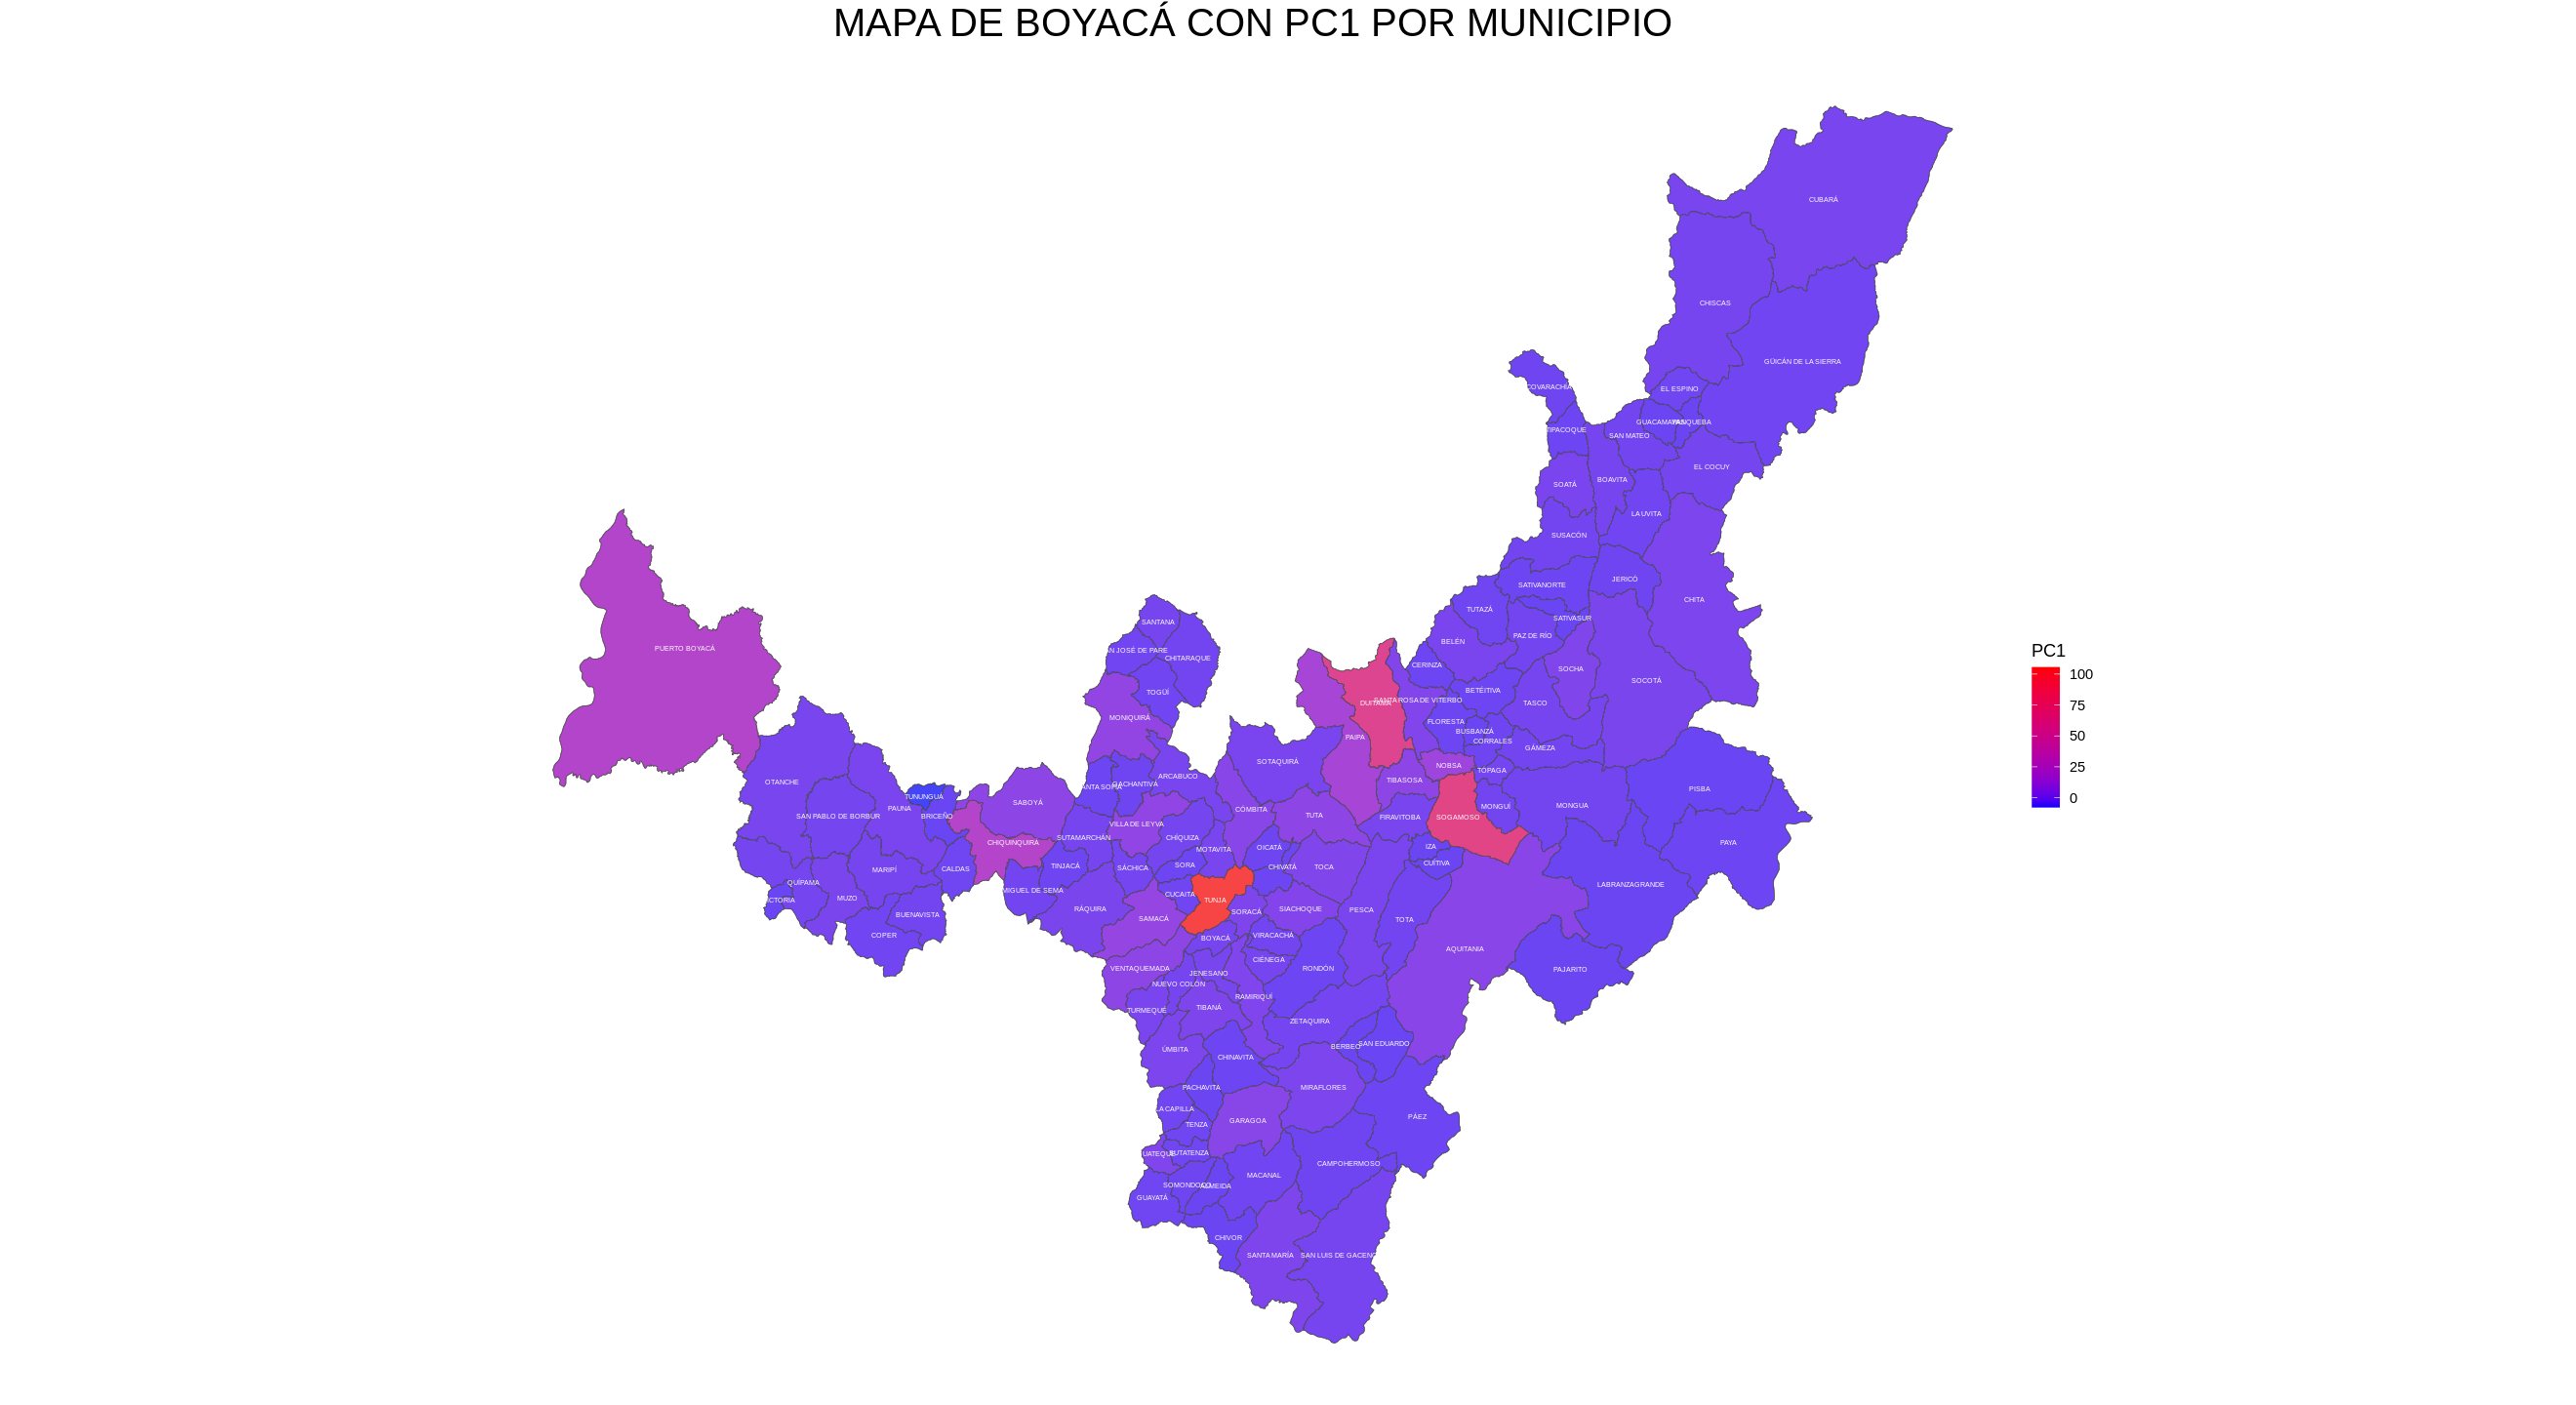

In [ ]:
library(ggplot2)

# Crear el mapa de Boyacá
mapa <- ggplot() +
  geom_sf(data = merged_data, aes(geometry = geometry)) +
  theme_void()

# Añadir el valor de PC1 como color en el mapa
mapa_colores <- mapa +
  geom_sf(data = merged_data, aes(geometry = geometry, fill = PC1), alpha = 0.7) +
  scale_fill_gradient(low = "blue", high = "red", na.value = "grey", name = "PC1") +
  labs(title = "MAPA DE BOYACÁ CON PC1 POR MUNICIPIO") +
  theme(plot.title = element_text(size = 24, hjust = 0.5))

options(repr.plot.width=22, repr.plot.height=12)

# Crear el mapa de Boyacá con nombres de municipios
mapa_etiquetas <- mapa_colores +
  geom_sf_text(data = merged_data, aes(geometry = geometry, label = Nombre), size = 1.5, color = "white") +
  theme(legend.position = "right")

# Mostrar el mapa con etiquetas de municipios
print(mapa_etiquetas)


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


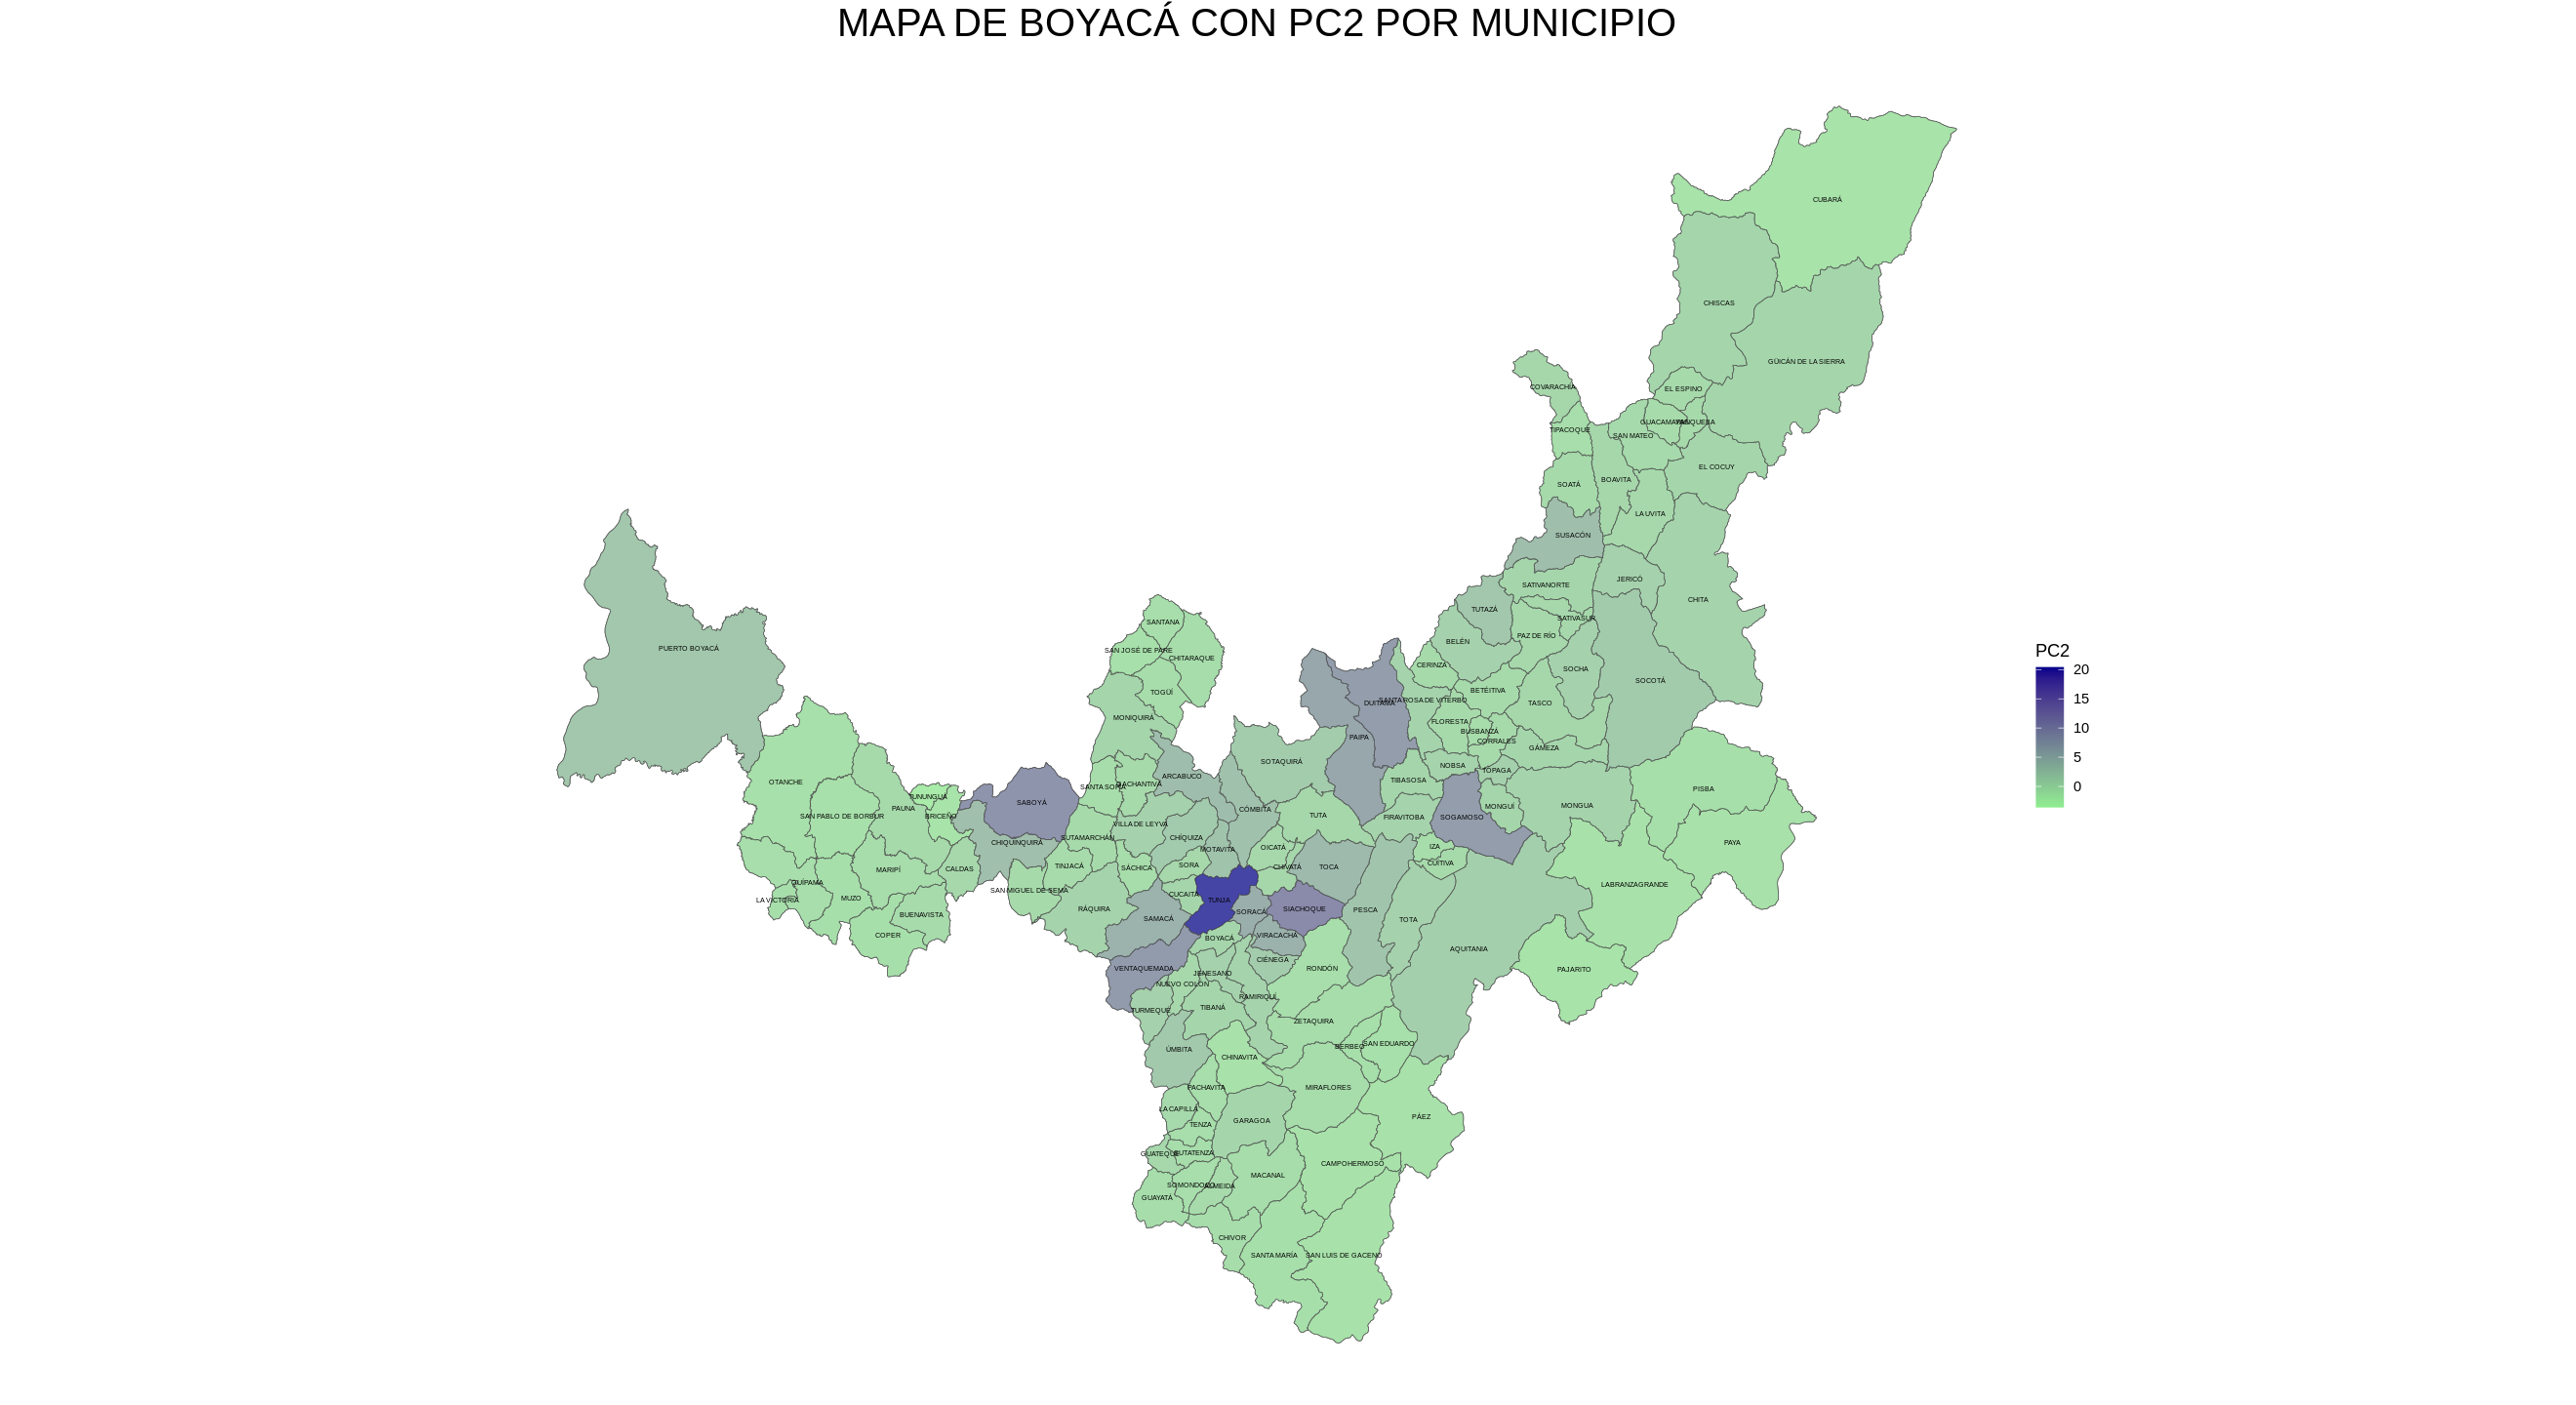

In [ ]:
library(ggplot2)

# Crear el mapa de Boyacá
mapa <- ggplot() +
  geom_sf(data = merged_data, aes(geometry = geometry)) +
  theme_void()

# Añadir el valor de PC2 como color en el mapa
mapa_colores <- mapa +
  geom_sf(data = merged_data, aes(geometry = geometry, fill = PC2), alpha = 0.7) +
  scale_fill_gradient(low = "lightgreen", high = "darkblue", na.value = "grey", name = "PC2") +
  labs(title = "MAPA DE BOYACÁ CON PC2 POR MUNICIPIO") +
  theme(plot.title = element_text(size = 24, hjust = 0.5))

options(repr.plot.width=22, repr.plot.height=12)

# Crear el mapa de Boyacá con nombres de municipios
mapa_etiquetas <- mapa_colores +
  geom_sf_text(data = merged_data, aes(geometry = geometry, label = Nombre), size = 1.5, color = "black") +
  theme(legend.position = "right")

# Mostrar el mapa con etiquetas de municipios
print(mapa_etiquetas)

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


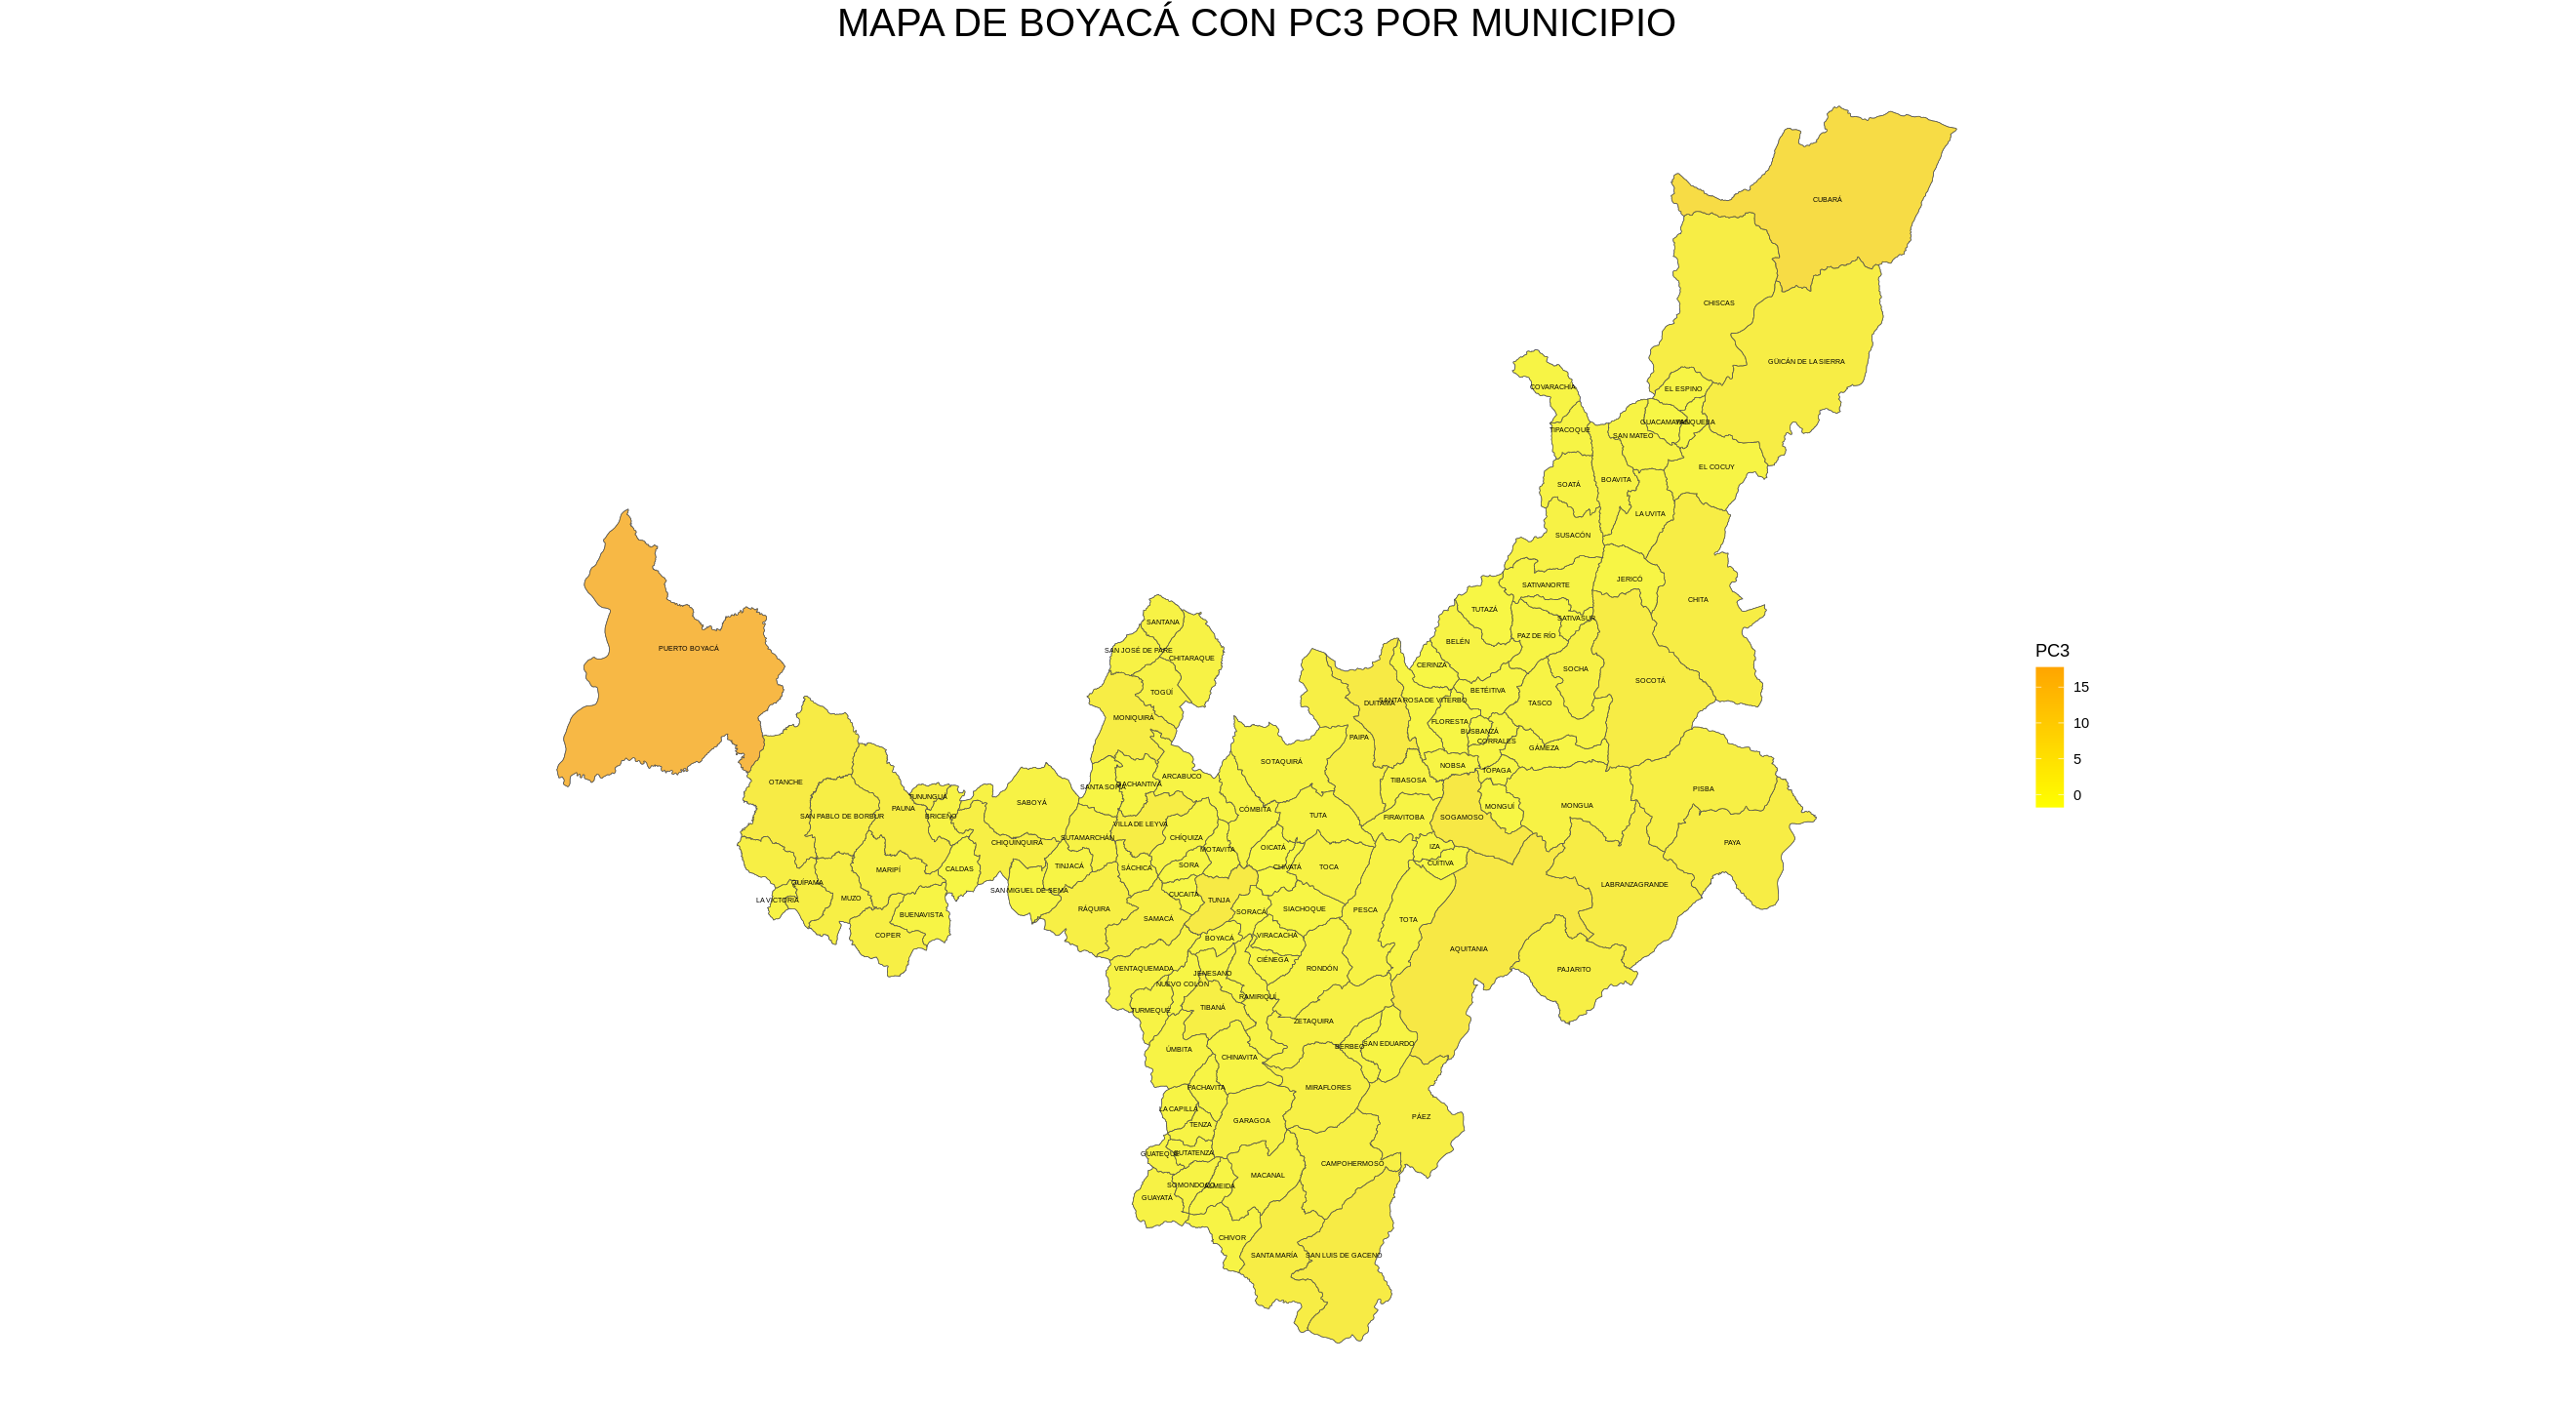

In [ ]:
library(ggplot2)

# Crear el mapa de Boyacá
mapa <- ggplot() +
  geom_sf(data = merged_data, aes(geometry = geometry)) +
  theme_void()

# Añadir el valor de PC3 como color en el mapa
mapa_colores <- mapa +
  geom_sf(data = merged_data, aes(geometry = geometry, fill = PC3), alpha = 0.7) +
  scale_fill_gradient(low = "yellow", high = "orange", na.value = "grey", name = "PC3") +
  labs(title = "MAPA DE BOYACÁ CON PC3 POR MUNICIPIO") +
  theme(plot.title = element_text(size = 24, hjust = 0.5))

options(repr.plot.width=22, repr.plot.height=12)

# Crear el mapa de Boyacá con nombres de municipios
mapa_etiquetas <- mapa_colores +
  geom_sf_text(data = merged_data, aes(geometry = geometry, label = Nombre), size = 1.5, color = "black") +
  theme(legend.position = "right")

# Mostrar el mapa con etiquetas de municipios
print(mapa_etiquetas)

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


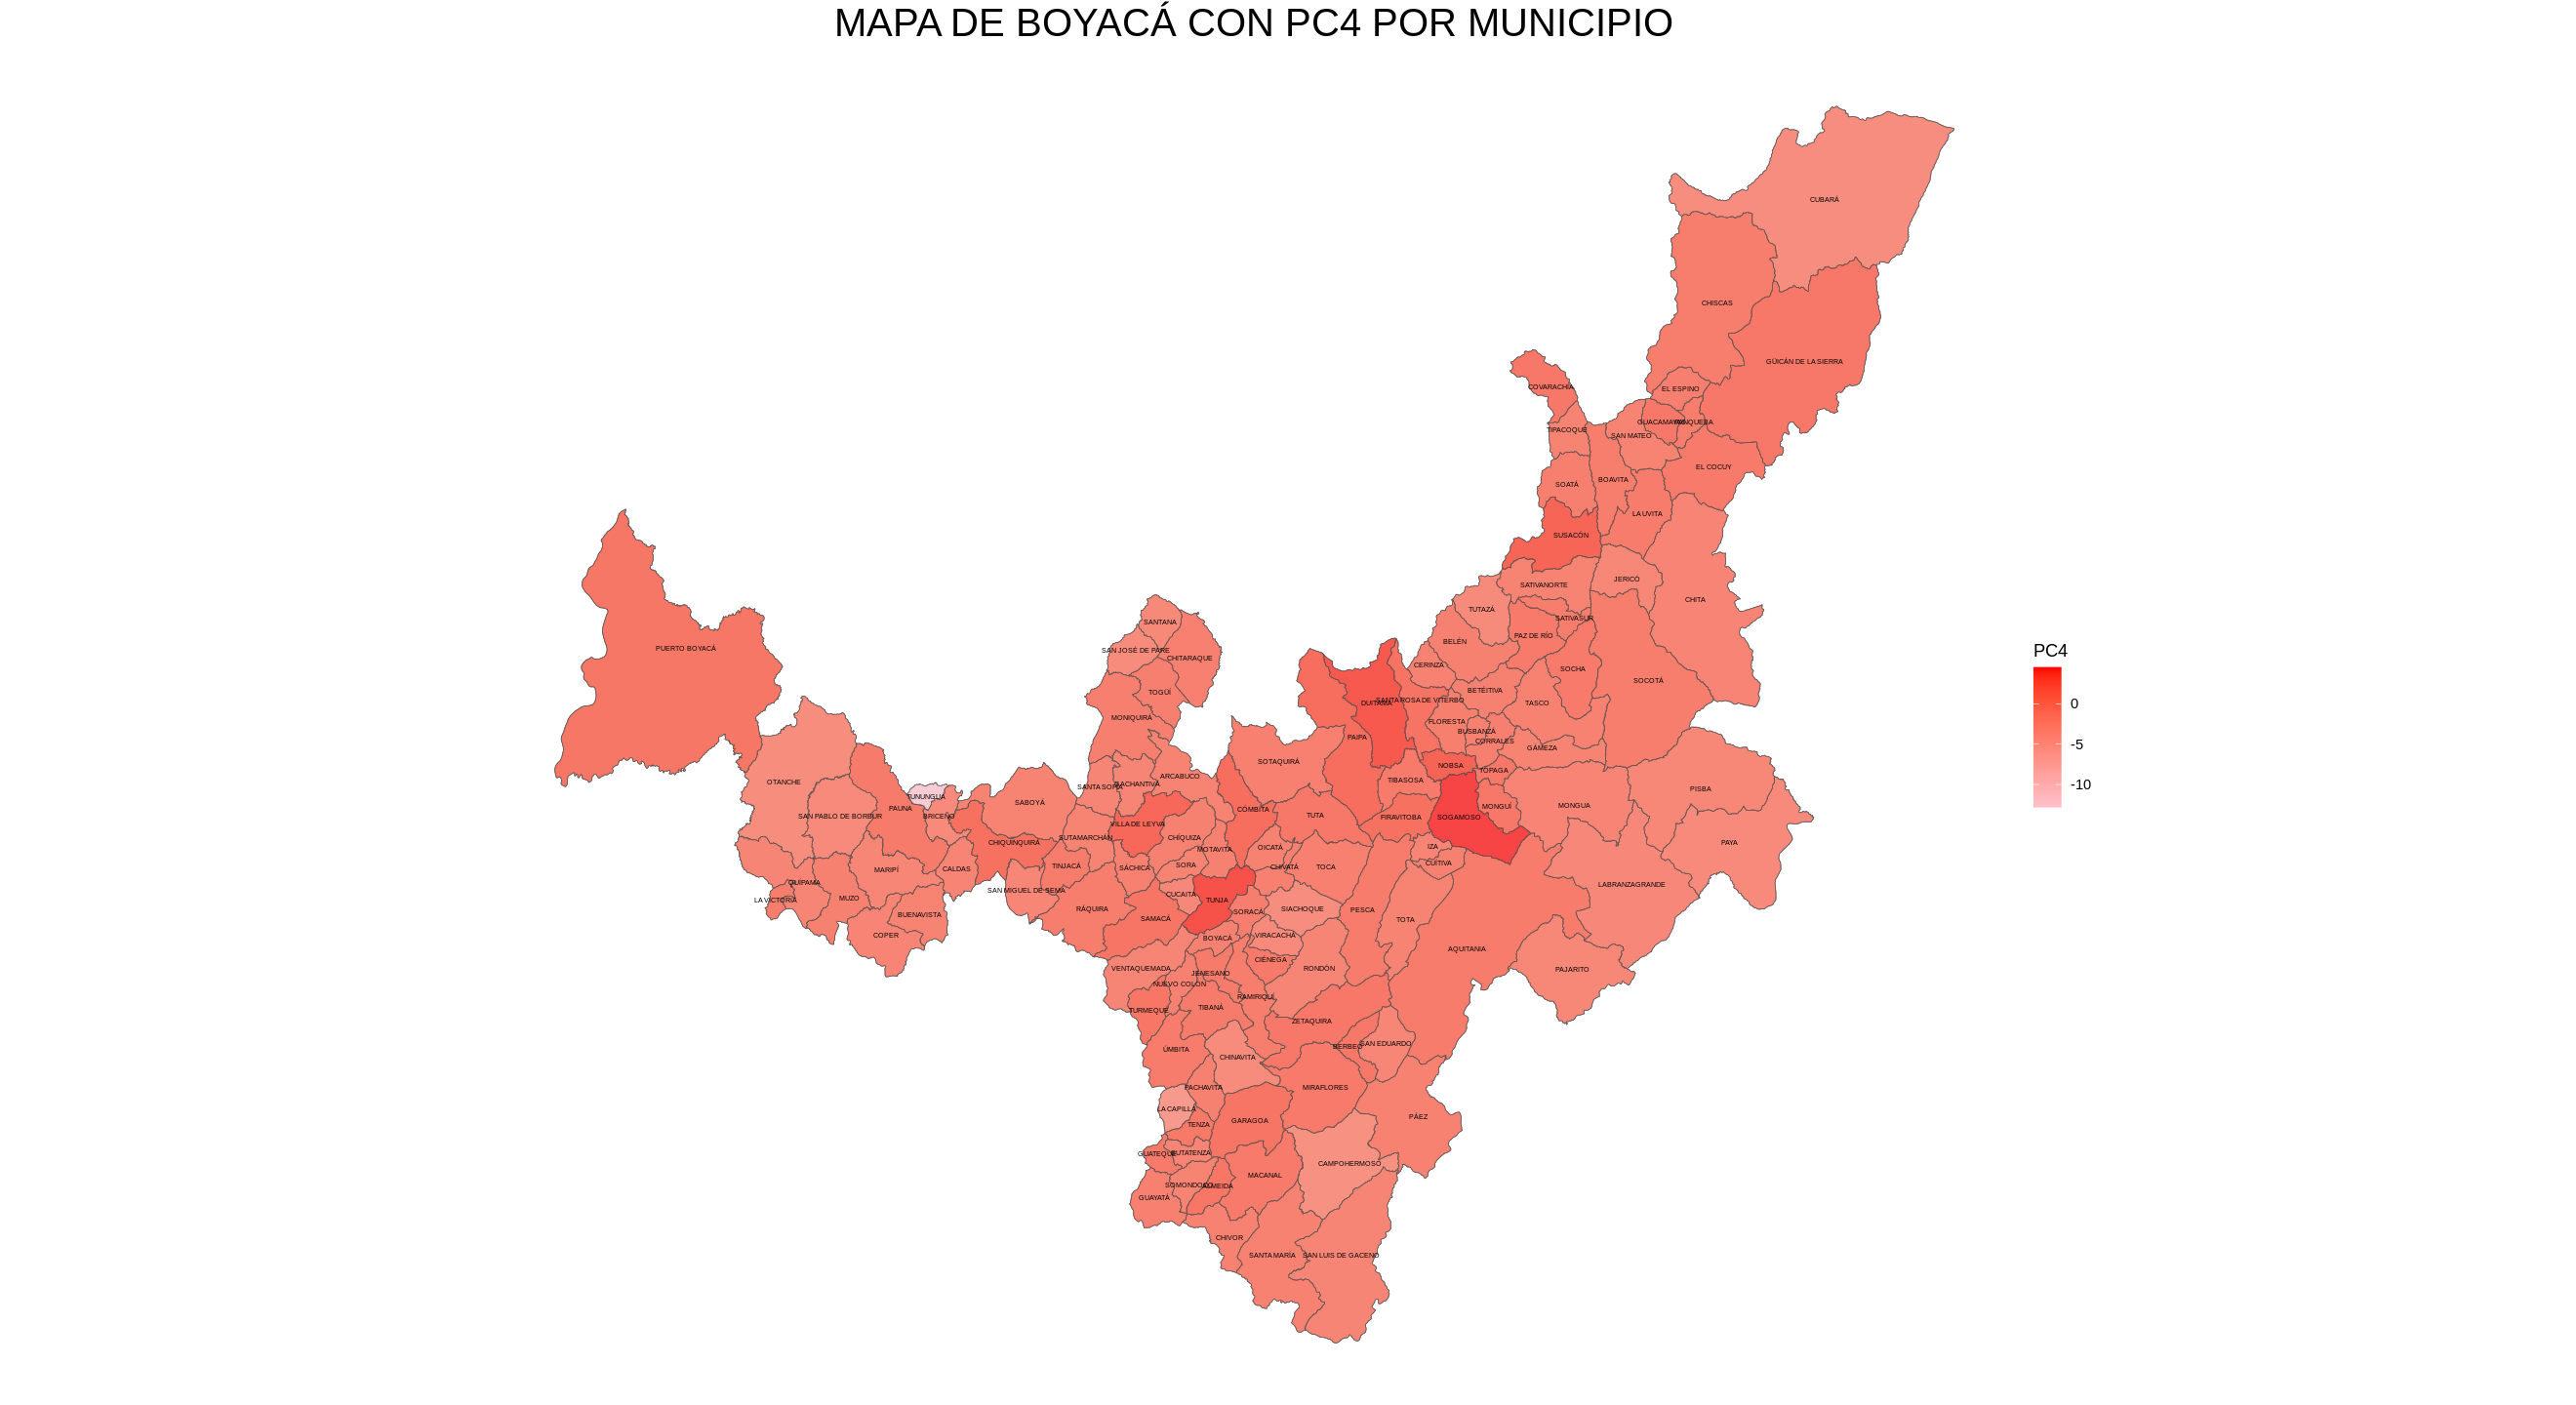

In [ ]:
library(ggplot2)

# Crear el mapa de Boyacá
mapa <- ggplot() +
  geom_sf(data = merged_data, aes(geometry = geometry)) +
  theme_void()

# Añadir el valor de PC4 como color en el mapa
mapa_colores <- mapa +
  geom_sf(data = merged_data, aes(geometry = geometry, fill = PC4), alpha = 0.7) +
  scale_fill_gradient(low = "pink", high = "red", na.value = "grey", name = "PC4") +
  labs(title = "MAPA DE BOYACÁ CON PC4 POR MUNICIPIO") +
  theme(plot.title = element_text(size = 24, hjust = 0.5))

options(repr.plot.width=22, repr.plot.height=12)

# Crear el mapa de Boyacá con nombres de municipios
mapa_etiquetas <- mapa_colores +
  geom_sf_text(data = merged_data, aes(geometry = geometry, label = Nombre), size = 1.5, color = "black") +
  theme(legend.position = "right")

# Mostrar el mapa con etiquetas de municipios
print(mapa_etiquetas)